# Petrophysics Project

## Set Virtual Enviroment

Before start data preprocessing there a few steps to properly set-up a virtual enviroment to provide an stable system to work with. Using conda to create a virtual enviroment and install libraries and frameworks that will be use during this project.

List of frameworks and libraries

- Tensorflow toolkit 

`conda install -c conda-forge cudatoolkit=11.2 cudnn=8.1.0`

- Tensorflow
- Missingno 
- Pandas
- Lasio
- Welly
- StriplogM
- matplotlib

If you have lithology data use:
https://github.com/rgmyr/litholog

In [1]:
# import libraries and frameworks

import pandas as pd
import missingno as msno
import lasio
import welly
import numpy as np
import os
import welly.quality as q
import seaborn as sns
import scipy

from IPython.display import clear_output

import matplotlib.pyplot as plt

## Filter selected tracks and save new files.

Es importante realizar un correcto filtrado de datos antes de entrenar un modelo de machine learning por varias razones:

1.  Mejora la calidad de los resultados: Los modelos de machine learning son solo tan buenos como los datos que se les proporcionan. Si los datos están incompletos, incorrectos o irrelevantes, el modelo no será preciso. Un correcto filtrado de datos asegura que solo se utilizan datos relevantes y precisos en el entrenamiento del modelo.
    
2.  Evita sesgos en los resultados: Los sesgos en los datos pueden llevar a un modelo que favorece a ciertos grupos o resultados en particular. Un correcto filtrado de datos puede ayudar a minimizar estos sesgos.
    
3.  Mejora la eficiencia del entrenamiento: Entrenar un modelo de machine learning con un conjunto de datos grande y no filtrado puede ser muy demandante en tiempo e intensivo en recursos. El filtrado de datos innecesarios antes del entrenamiento puede hacer que el proceso de entrenamiento sea más rápido y eficiente.
    
4.  Evita problemas de sobreajuste: El sobreajuste se produce cuando un modelo se ajusta demasiado a los datos de entrenamiento y no es capaz de generalizar bien a datos nuevos. El filtrado de datos innecesarios puede ayudar a evitar el sobreajuste al reducir la complejidad del modelo.
    

En resumen, el filtrado de datos es importante para garantizar que se utilicen datos relevantes y precisos para entrenar un modelo de machine learning, minimizar sesgos en los resultados, mejorar la eficiencia del entrenamiento y evitar el sobreajuste.


Training a deep learning model involves several key steps. Here is a general outline to guide you through the process:

1. Define the problem: Identify the problem you want to solve, such as image classification, natural language processing, or recommendation systems. Make sure the problem can be addressed using deep learning techniques.

2. Collect and prepare the data: Gather a large and diverse dataset relevant to your problem. The data should be representative of the problem domain. Preprocess the data by cleaning, normalizing, and transforming it into a suitable format for training the model.

3. Split the data: Divide the dataset into training, validation, and test sets. The training set is used to train the model, the validation set is used to fine-tune the model and select the best hyperparameters, and the test set is used to evaluate the model's performance on unseen data.

4. Select the model architecture: Choose a suitable deep learning model architecture based on your problem domain, such as convolutional neural networks (CNNs) for image classification, recurrent neural networks (RNNs) or transformers for natural language processing, or autoencoders for unsupervised learning.

5. Set the hyperparameters: Choose appropriate hyperparameters for your model, such as learning rate, batch size, number of layers, number of neurons per layer, activation functions, and regularization techniques. You can use techniques like grid search, random search, or Bayesian optimization to find the optimal hyperparameters.

6. Train the model: Train the deep learning model using the training data and a suitable optimization algorithm like stochastic gradient descent (SGD), Adam, or RMSProp. Update the model weights iteratively to minimize the loss function. Monitor the training process using metrics like accuracy, precision, recall, or F1 score.

7. Validate the model: Periodically evaluate the model on the validation set during training to prevent overfitting and ensure the model generalizes well to new data. Use techniques like early stopping, dropout, or L1/L2 regularization to mitigate overfitting.

8. Tune the model: Based on the validation set performance, fine-tune the model by adjusting hyperparameters, the model architecture, or the training procedure. Repeat steps 6 and 7 until satisfactory performance is achieved.

9. Evaluate the model: Once the model has been trained and tuned, evaluate its performance on the test set to get an unbiased estimate of its generalization ability.

10. Deploy the model: If the model's performance is satisfactory, deploy it in a production environment to make predictions or solve the target problem.

11. Monitor and update the model: Continuously monitor the model's performance in the production environment, and retrain or update the model as needed to maintain optimal performance.

Remember that deep learning models may require significant computational resources and time to train, especially for large and complex datasets.

### Step 2: Collect and prepare the data

Data collection and preparation are crucial steps in the deep learning process, as the quality and quantity of data directly impact the model's performance. Here's a detailed breakdown of this step:

#### 2.1 Data collection: > [!NOTE-->Done]
>Identify sources: Find relevant data sources based on your problem domain. These sources can include public datasets, web scraping, APIs, or your organization's internal data.
Gather data: Collect a large and diverse dataset that is representative of the problem you aim to solve. The dataset should contain enough samples and variability to enable the model to learn effectively.

#### 2.2. Data exploration: > [!NOTE]
> Understand the data: Analyze the dataset's structure, features, and distributions. Visualize the data using plots and charts to gain insights into relationships and patterns.
Identify issues: Look for potential issues in the data, such as missing values, duplicate records, or class imbalances, that may affect the model's performance.

#### Step 2.2: Data exploration

Data exploration is the process of understanding the dataset's structure, features, and distributions. This step helps to identify potential issues and provides insights into relationships and patterns in the data that can inform subsequent steps in the model training process. Here's a detailed breakdown of this step:

2.2.1. Summarize the data:
a. Descriptive statistics: Calculate measures like mean, median, mode, standard deviation, and range for each feature to understand their central tendencies and dispersion.
b. Data types: Identify the data types of each feature (e.g., numerical, categorical, ordinal, or datetime) to help determine appropriate preprocessing techniques.

2.2.2. Visualize the data:
a. Histograms: Plot histograms for each feature to examine their distributions and identify skewness or outliers.
b. Box plots: Use box plots to detect potential outliers and understand the spread of the data.
c. Scatter plots: Create scatter plots for pairs of features to visualize relationships, correlations, or clusters.
d. Heatmaps: Generate heatmaps to visualize the correlation matrix between numerical features, helping to identify multicollinearity and potential feature importance.
e. Bar charts: Use bar charts to visualize the distribution of categorical features and identify imbalances in class representation.
f. Time series plots (if applicable): If dealing with time series data, plot the data over time to detect trends, seasonality, or anomalies.

2.2.3. Analyze relationships:
a. Feature correlations: Calculate correlation coefficients (e.g., Pearson, Spearman) between pairs of numerical features to identify linear or monotonic relationships.
b. Contingency tables: For categorical features, create contingency tables to examine relationships or associations between variables.
c. Feature importance (preliminary): Conduct preliminary feature importance analysis using techniques like mutual information or univariate feature selection methods (e.g., Chi-square test, ANOVA).

2.2.4. Identify issues:
a. Missing values: Check for missing data in each feature, and determine the proportion of missing values relative to the total number of records.$$
b. Duplicate records: Search for duplicate entries in the dataset that may lead to overfitting or biased training.
c. Class imbalances: Assess the distribution of classes in the target variable (for classification problems) and determine if there are significant imbalances that may affect the model's performance on minority classes.
d. Outliers: Identify extreme values or outliers in the dataset that may skew the model's learning or impact its performance.
e. Multicollinearity: Detect features that are highly correlated with each other, which may cause instability in the model or reduce its interpretability.

After thoroughly exploring the dataset, you'll have a better understanding of its structure, potential issues, and relationships between features. This understanding can inform subsequent data cleaning, preprocessing, and feature engineering steps.

*Boxplots*

In [4]:
def make_boxplot(welldata):
    las = lasio.read(well_path)
    # convert las file to dataframe
    df = las.df()
    inputs = list(df.columns)
    num_inputs = len(inputs)

    fig, axs = plt.subplots(1, num_inputs, figsize=(20,10))

    for i, (ax, curve) in enumerate(zip(axs.flat, inputs), 1):
        sns.boxplot(y=df[curve], ax=ax, color='cornflowerblue', showmeans=True,  
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                          "markersize":"10"},
               flierprops={'marker':'o', 
                          'markerfacecolor':'darkgreen',
                          'markeredgecolor':'darkgreen'})

        ax.set_title(inputs[i-1])
        ax.set_ylabel('')

        if df.columns[i-1] in {'CILD', 'ILD', 'ILM', 'MI', 'MN', 'MINV', 'MNOR', 'RILD', 'RILM', 'MEL15', 'MEL20'}:
            ax.semilogy()

    plt.subplots_adjust(hspace=0, wspace=0.75)
    plt.show()

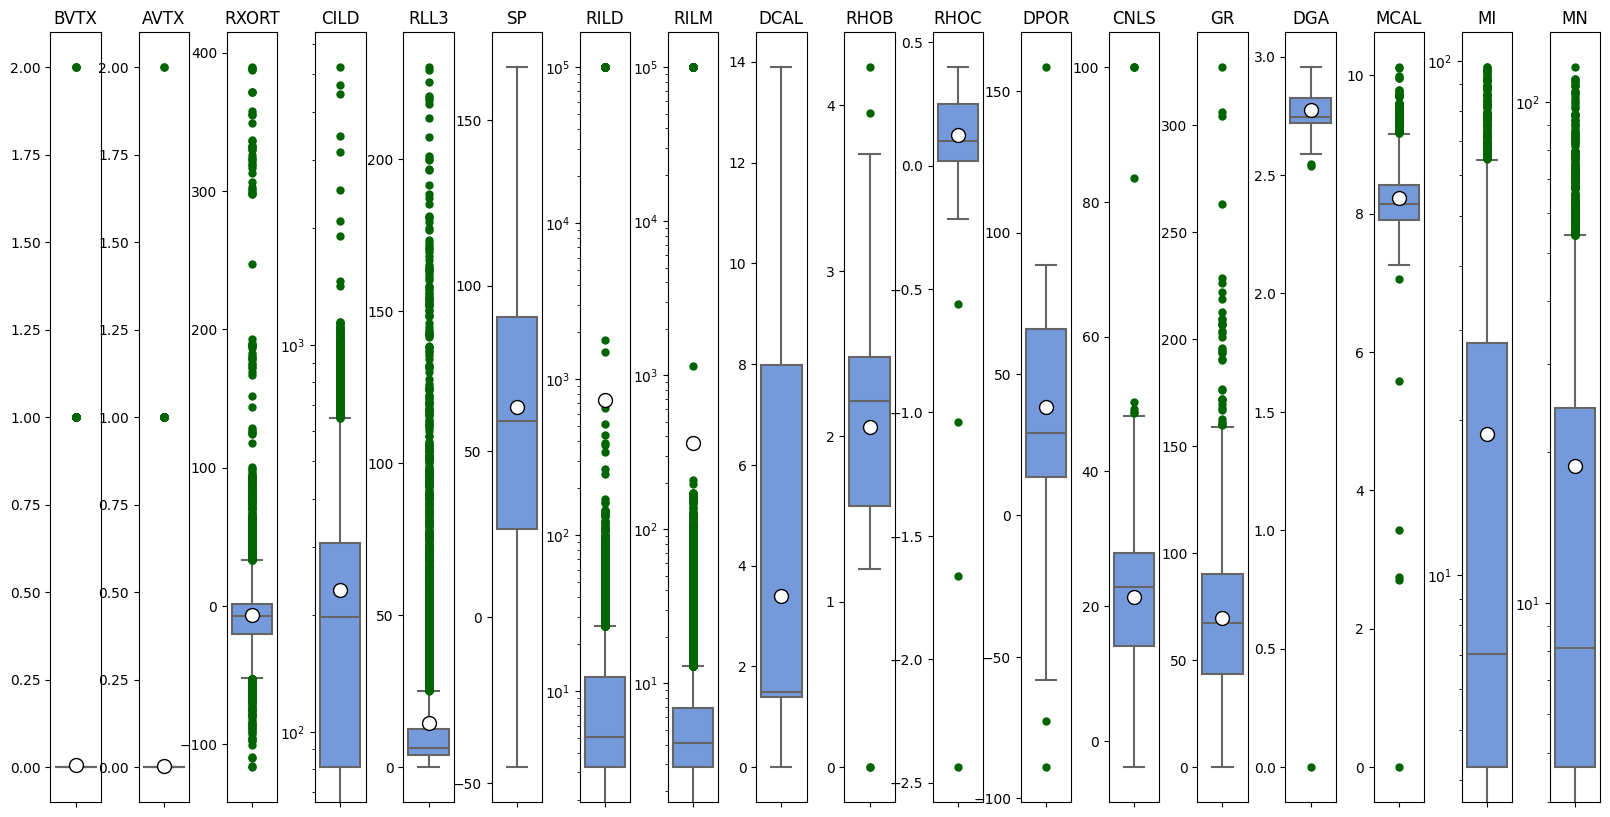

In [5]:
well_path = r'../v1.0_rawdata/1045146404.las'

#make boxplot
make_boxplot(well_path)


*Heatmap*

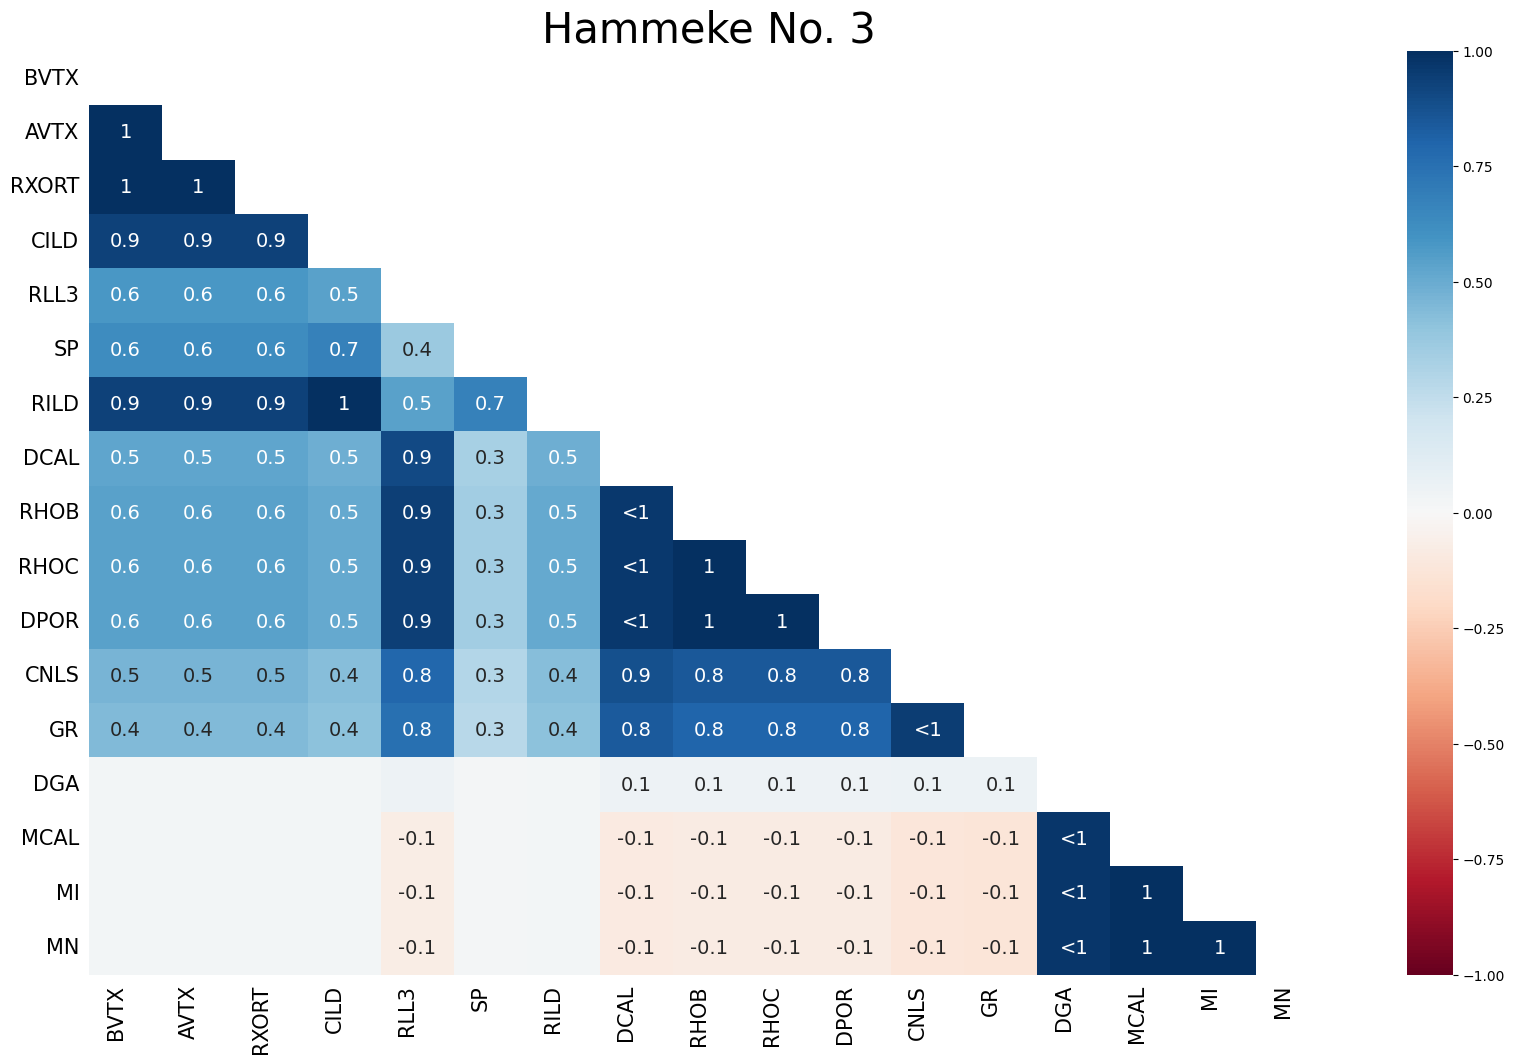

In [26]:
def heatmap(well_path):
    well = welly.Well.from_las(well_path)
    # make a dataframe from well
    df = well.df()
    msno.heatmap(df)
    # add well name to title
    plt.title(well.name)
    # title size
    plt.title(well.name, fontsize=30)
    # add x label
    plt.xticks(fontsize=15, rotation=90)
    # add y ticks
    plt.yticks(fontsize=15)
    # show plot
    plt.show()

heatmap(well_path)

*Bar*

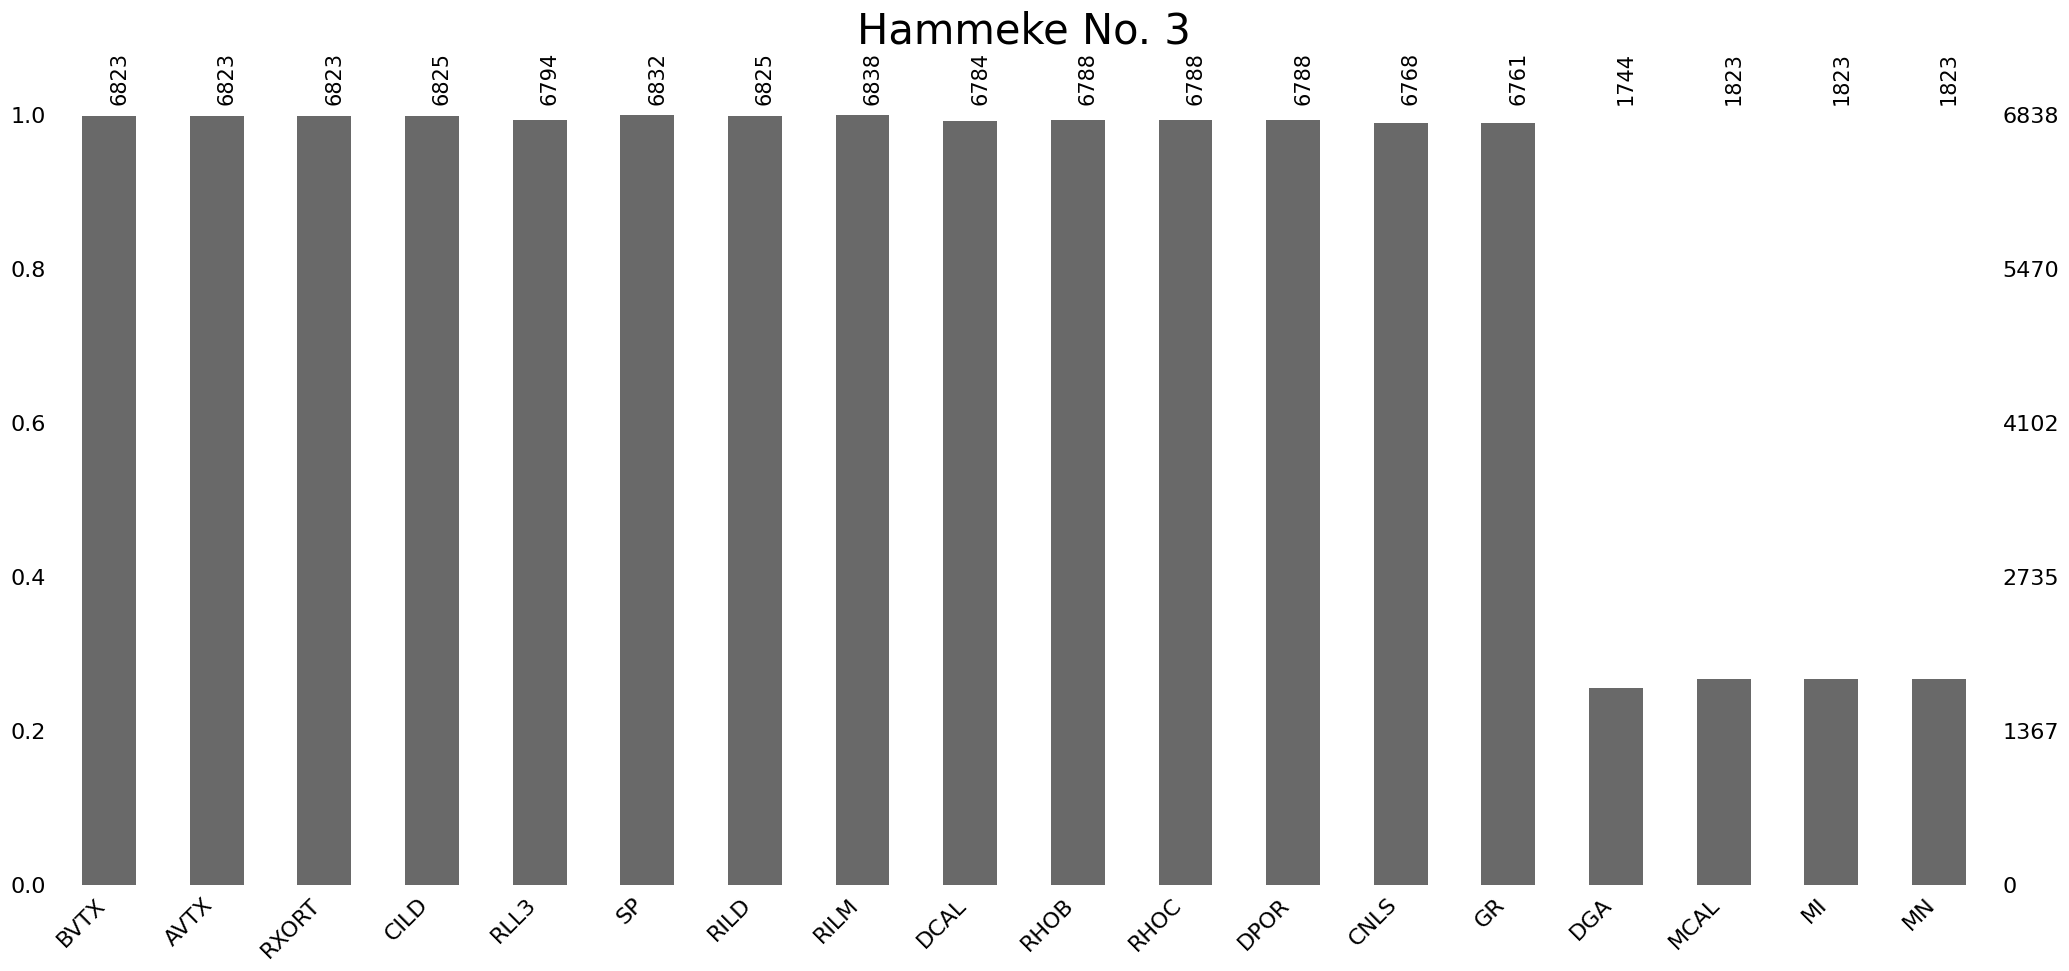

In [46]:
def bar(well_path):
    well = welly.Well.from_las(well_path)
    # make a dataframe from well
    df = well.df()
    msno.bar(df)
    # add well name to title
    plt.title(well.name)
    # title size
    plt.title(well.name, fontsize=30)
    # add x ticks
    plt.xticks(fontsize=15, rotation=90)
    # add y ticks
    plt.yticks(fontsize=15)
    # show plot
    plt.show()

bar(well_path)

*Matrix*

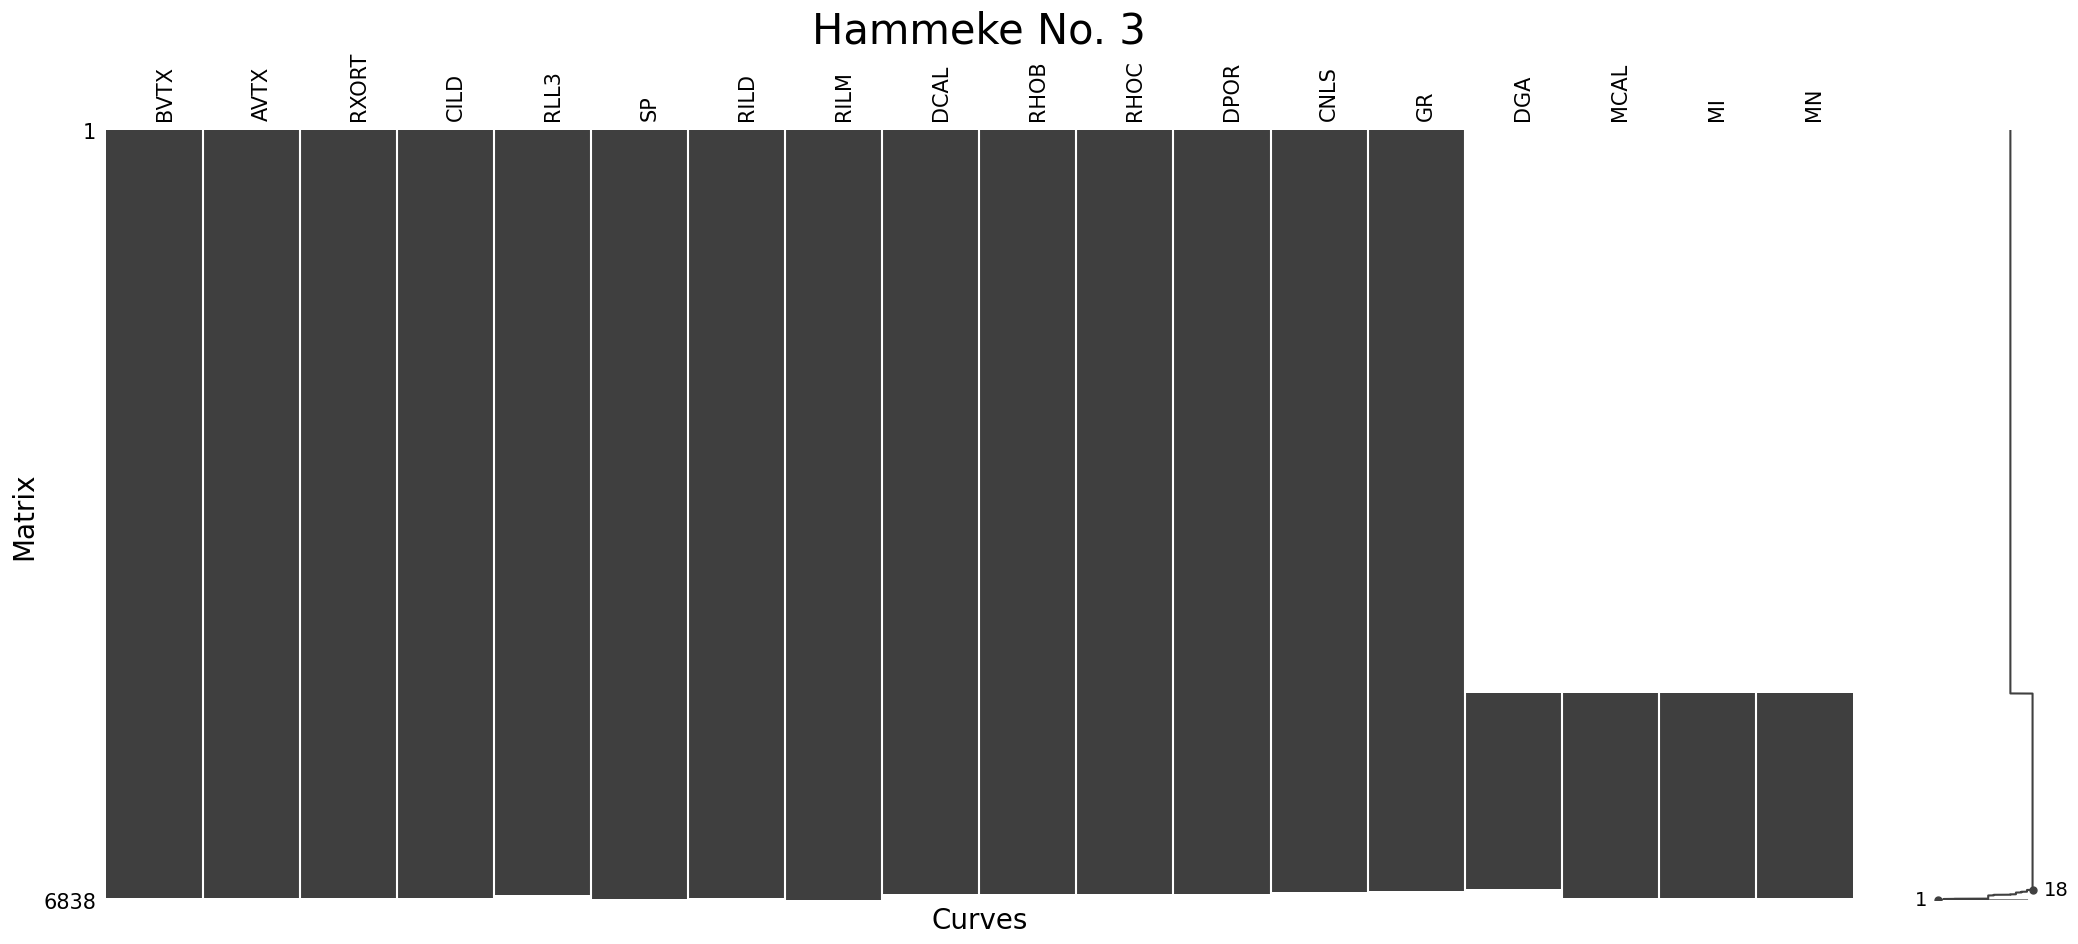

In [48]:
def matrix(well_path):
    well = welly.Well.from_las(well_path)
    # make a dataframe from well
    df = well.df()
    msno.matrix(df)
    # add well name to title
    plt.title(well.name)
    # title size
    plt.title(well.name, fontsize=30)
    # add x label
    plt.xlabel('Curves', fontsize=20)
    # add y label
    plt.ylabel('Matrix', fontsize=20)
    # add x ticks
    plt.xticks(fontsize=15, rotation=90)
    # add y ticks
    plt.yticks(fontsize=15)
    # show plot
    plt.show()

matrix(well_path)

*Dendrogram*

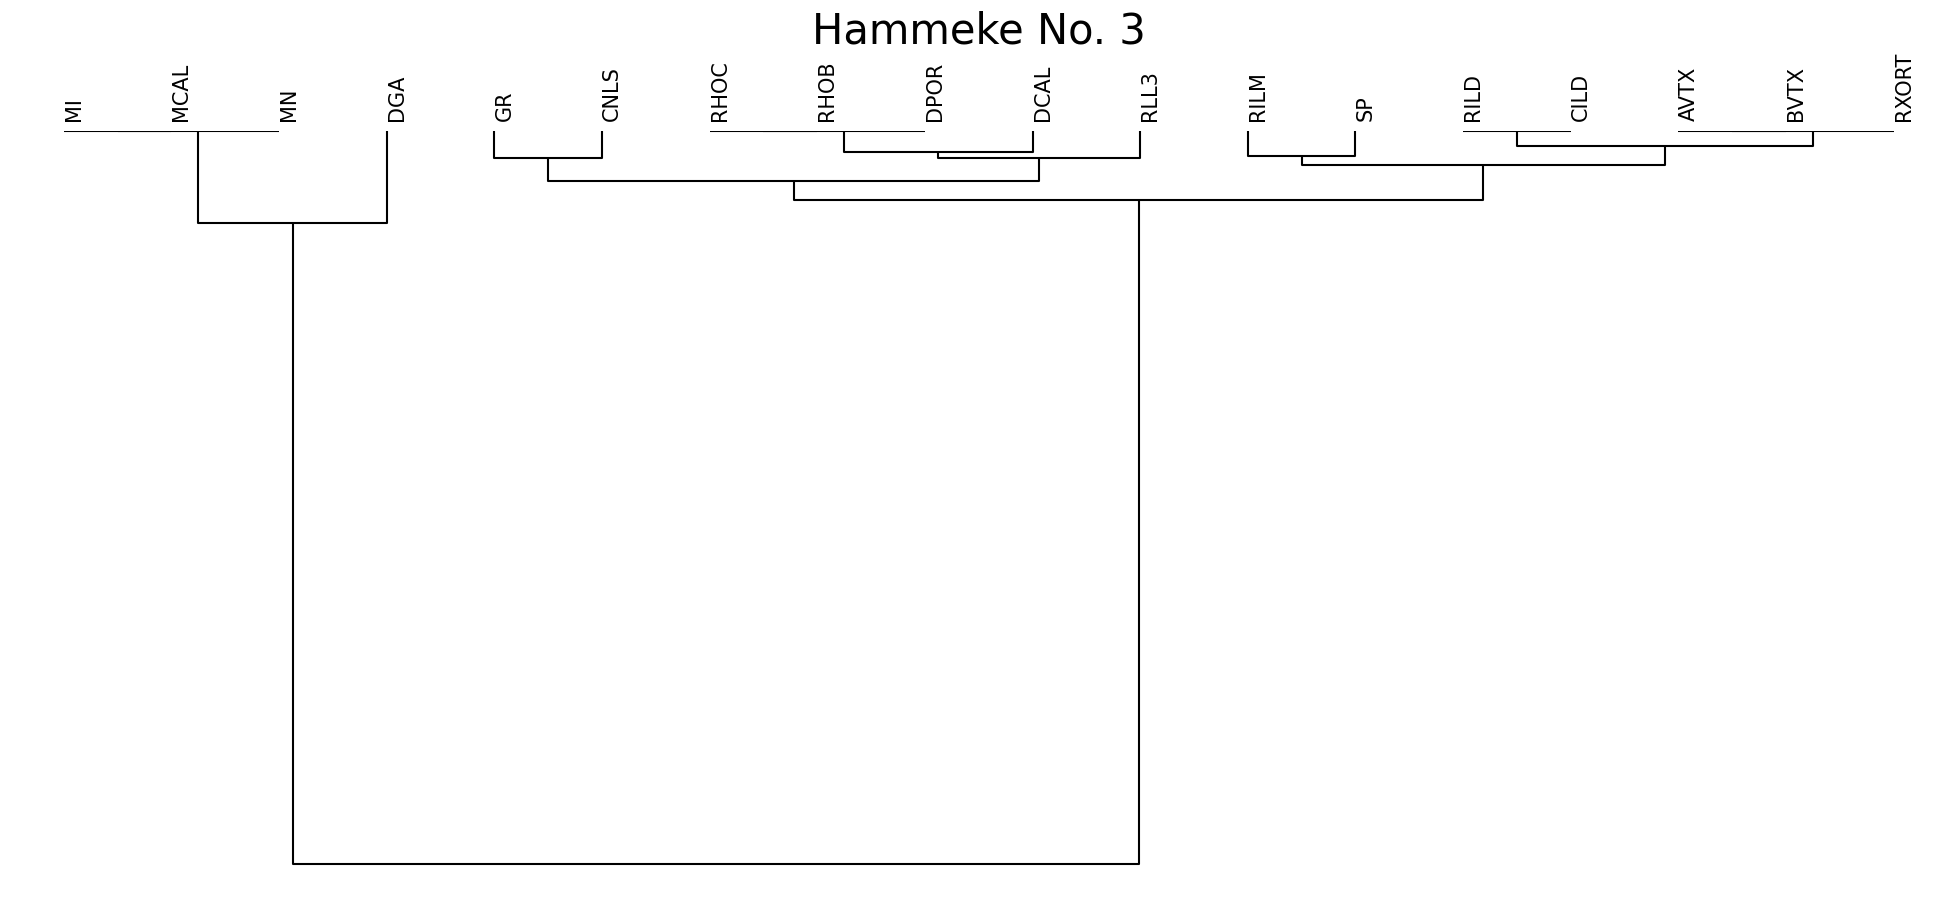

In [51]:
def dendrogram(well_path):
    well = welly.Well.from_las(well_path)
    # make a dataframe from well
    df = well.df()
    msno.dendrogram(df)
    # add well name to title
    plt.title(well.name)
    # title size
    plt.title(well.name, fontsize=30)
    # add x ticks
    plt.xticks(fontsize=15, rotation=90)
    # hide y ticks
    plt.yticks([])
    # show plot
    plt.show()

dendrogram(well_path)

#### 2.3. Data cleaning: > [!NOTE-->Done]
> Handle missing values: Deal with missing data by using techniques such as imputation, deletion, or interpolation, depending on the nature and amount of missing data.
Remove duplicates: Eliminate duplicate records to prevent overfitting and biased training.
Correct inconsistencies: Fix inconsistencies or errors in the data, such as typos, incorrect labels, or formatting issues.

*Se están eliminando los archivos `.las` con nombres ambiguos y pozos de inyección porque no son relevantes para el análisis o procesamiento de datos. También es posible que los archivos con nombres ambiguos y pozos de inyección contengan datos que no son consistentes con los demás archivos, se eliminan archivo que contengan pocos registros (casos con 2 registros en el pozo). Una vez terminado el filtrado preliminar de datos y seleccion de registros para el modelo se procede con deteccion de outliers*

In [1]:
'''ChatGPT
-------
This code defines a function called `las_list` that takes a string argument `path` representing the path to a folder. The function returns a list of file paths to files with the `.las` extension that are present in the specified folder.
The function first initializes an empty list called `las_file_list` that will be used to store the file paths. It then uses the `os.listdir()` function to get a list of all the files in the specified folder.
The function then iterates through the list of files and checks if each file has the `.las` extension. If a file has the `.las` extension, its file path is appended to the `las_file_list` list.
Finally, the function returns the `las_file_list` list.
After the function definition, the `path` variable is initialized to a string representing the path to a specific folder. The `las_list` function is then called with `path` as an argument, and the returned list is stored in the `las_file_list` variable.
'''

def las_list(path: str):
    """ Make a list with .las file present in the folder path

    Args:
        path (str): Folder where .las files are present

    Returns:
        _type_: List with .las path file
    """

    las_file_list = []
    files = os.listdir(path)

    for file in files:
        if file.lower().endswith('.las'):
            las_file_list.append(path + file)

    return las_file_list

# Field name folder with .las files
# path = r'..\Fields\Kansas Fields\ZENITH-PEACE CREEK\v1.3_filter_invalid_data/'
# las_file_list = las_list(path)


In [24]:
def tracks_in_well(las_file_list):
    """ Rutina para sacar nombre del pozo y los registros que tienen este archivo .las
    los almacena a modo de lista y lo exporta en un documento de texto plano (no tab delemited)
    guarda el archivo en el origen del archivo python que contiene esta rutina

    Args:
        las_file_list (_type_): List with .las path file
    """

    rows, cols = (0, 2)
    tablalist = [[0]*cols]*rows

    # column position
    x_writer = 0

    for l in las_file_list:

        list_registros = []
        las = lasio.read(l)
        lasdf = las.df()
        pozo = las.well.WELL.value
        registros = lasdf.keys()

        for regs in range(len(registros)):
            list_registros = np.append(list_registros, registros[regs])

        tablalist.append([pozo, str(list_registros)])
        x_writer = x_writer + 1

    with open('tracks_in_well.txt', 'w') as temp_file:
        for item in tablalist:
            temp_file.write("%s\n" % item)

# tracks_in_well(las_file_list)

In [23]:
def total_logs_field(las_file_list):
    """ Hace una lista de los registros totales que fueron corridos en el campo, 
    agrega mnemonic, unidades para cada track, descripcion del registro
    exporta texto plano no delimited.

    Args:
        las_file_list (_type_):List with .las path file
    """

    rows, cols = (0, 3)
    list = [[0]*cols]*rows

    for file in las_file_list:

        las = lasio.read(file)
        for key in las.keys():
            list.append(
                (las.curves[key].mnemonic, las.curves[key].unit, las.curves[key].descr))

    with open('total_logs_field2.txt', 'w') as f:
        for line in list:
            f.write(f"{line}\n")

# total_logs_field(las_file_list)

In [21]:
# crea la lista de los registros (ideal set-up)

keep_curves = ['DEPTH', 'DEPT', 'TDVSS', 'TVD', 'PGTVD',                                                                    # Geometrico
               # Geometrico
               'CLDC', 'DCAL', 'MCAL', 'MELCAL', 'MSFCAL',
               # Basics
               'GR', 'GRGM', 'SP', 'DT',
               'CILD', 'MI', 'MN', 'RILD', 'RILM', 'MEL15', 'MEL20',   # Resistives
               # Density
               'RHOB',
               # Neuntrón
               'NEU', 'NPHI', 'NPOR',
               ]

# Null Policies

null_policy = {
    'none': [],
    'strict': ['NULL', ],
    'common': ['NULL', '(null)', '-',
               '9999.25', '-9999.25', '999.25', '-999.25', '9999.99', '-9999.99', '100000',
               'NA', 'INF', 'IO', 'IND'],
    'aggressive': ['NULL', '(null)', '--',
                   '9999.25', '999.25', 'NA', 'INF', 'IO', 'IND',
                   '999', '999.99', '9999', '9999.99' '2147483647', '32767',
                   '-0.0', ],
    'all': ['NULL', '(null)', '-',
            '9999.25', '999.25', 'NA', 'INF', 'IO', 'IND',
            '999', '999.99', '9999', '9999.99' '2147483647', '32767', '-0.0',
            'numbers-only', ],
    'numbers-only': ['numbers-only', ]
}

# Groupping logs for preprocessing

alias = {
    'Caliper': ['DCAL', 'MCAL', 'MELCAL'],
    "Gamma": ['GR', 'GRGM'],
    "SP": ['SP'],
    "Resistive": ['CILD', 'MI', 'MN', 'RILD', 'RILM', 'MEL15', 'MEL20'],
    "Sonic": ['DT'],
    "Density": ['RHOB'],
    'Neutron': ['NEU', 'NPHI', 'NPOR'],
}

In [3]:
def valid_name(well_name):
    ''' script to filter special caractheres in well name to avoid bugs when file is saved.

        Args:
        well_name (str): str of well name with special characteres

    Returns:
        name: name with valid format

    '''
    # A list of special_characters to be removed
    special_characters = ['@', '#', '$', '*', '&', '/', '.', '"']

    for i in special_characters:
        # Replace the special character with an empty string
        name = well_name.replace(i, "")
    # Print the string after removal of special characters
    return name

# las_file_list = las_list(path)

# for file in las_file_list:
#     well,  = welly.read_las(file, null_policy='common', alias=alias)
#     name = valid_name(str(well.name))
#     save_path = r'..\Fields\Kansas Fields\ZENITH-PEACE CREEK\v1.1_trackselected/' + name + r'.las'
#     well.to_las(save_path, keys=keep_curves, fmt='%.4f',
#                 column_fmt={0: '%.2f'}, mnemonics_header=True)

# clear_output(wait=False)

In [63]:
# Use lasio to delete rows from a dataframe with null values using null_policy and save in v_1.3_filter_invalid_data

las_file_list = las_list(
    r'../v1.2_files_seleted/')

def filter_invalid_data(las_file_list):
    ''' The code reads in each file using the `lasio` library, and then converts it to 
        a Pandas DataFrame using the `df()` method. It then iterates through each curve 
        in the LAS file, ignoring certain curves that are specified in the `if` statement.

        Args:
        las_file_list (list): list of las files

        Returns:
        las files filtered in v_1.3_filter_invalid_data folder
    '''

    for file in las_file_list:
        # read las file
        las = lasio.read(file, null_policy='common')
        # make a list of curves in las file
        curves = las.keys()
        # make a dataframe from las file
        df = las.df()

        # For loop itering in each curve ignoring MD, TVD, TVDSS, DEPT or DEPTH
        for curve in curves:

            if curve in ['MD', 'TVD', 'TVDSS', 'DEPT', 'DEPTH']:
                continue
                # Delete data with values less that 0 for 'DCAL', 'MCAL', 'MELCAL'
            elif curve in ['DCAL', 'MCAL', 'MELCAL']:
                # Delete data with values less that 0
                df = df[df[curve] > 0]
            else:
                # make a list of indexes with null and NaN values
                null_index = df[df[curve].isnull()].index
                # delete rows with null values
                df.drop(null_index, inplace=True)
                # delete rows with NaN values
                df.dropna(inplace=True)
                # make a list of indexes with values according to dict null policies
                null_policy_index = df[df[curve].isin(
                    null_policy['common'])].index
                # delete rows with null_policy_index
                df.drop(null_policy_index, inplace=True)
                # make a list of indexes with values equal to 100000
                over_index = df[df[curve] == 100000].index
                # # delete rows with over_index
                df.drop(over_index, inplace=True)

        # set lasio from dataframe
        las.set_data(df)

        # set well from lasio
        well = welly.Well.from_lasio(las)

        # save las file
        name = valid_name(str(las.well['WELL'].value))
        save_path = r'../v1.3.1_filter_invalid_data/' + name + r'.las'
        well.to_las(save_path, keys=keep_curves, fmt='%.4f',
                    column_fmt={0: '%.2f'}, mnemonics_header=True)

    clear_output(wait=False)

filter_invalid_data(las_file_list)

In [9]:
def plot_dendromatrix(well_path):
    well = welly.Well.from_las(well_path)
    # make a dataframe from well
    df = well.df()
    # Create a figure with subplots with size ratio 0.75, 0.25 reduce the size between the two subplots
    fig, (ax1, ax2) = plt.subplots(
        2, 1, gridspec_kw={'height_ratios': [0.5, 0.5]})
    # reduce the space between the subplots
    fig.subplots_adjust(hspace=0.05)
    # make figure size
    fig.set_size_inches(12, 10)
    # add title to figure
    fig.suptitle(well.name, fontsize=15)

    # Plot the matrix on the first subplot with MD as index
    msno.matrix(df, ax=ax1, sort='ascending', sparkline=False, fontsize=8)
    # x ticks and font size and y ticks and font size
    ax1.set_xticklabels(df.columns, fontsize=10, rotation=90)
    # set y label
    ax1.set_ylabel('MD', fontsize=12)

    # Plot the dendrogram on the second subplot
    msno.dendrogram(df, ax=ax2, orientation='bottom', fontsize=8)
    ax2.set_xticklabels(df.columns)
    # hide x ticks
    ax2.set_xticks([])
    # set grid in ax2
    ax2.grid()
    plt.show()


*Archivo pre-filtrado*

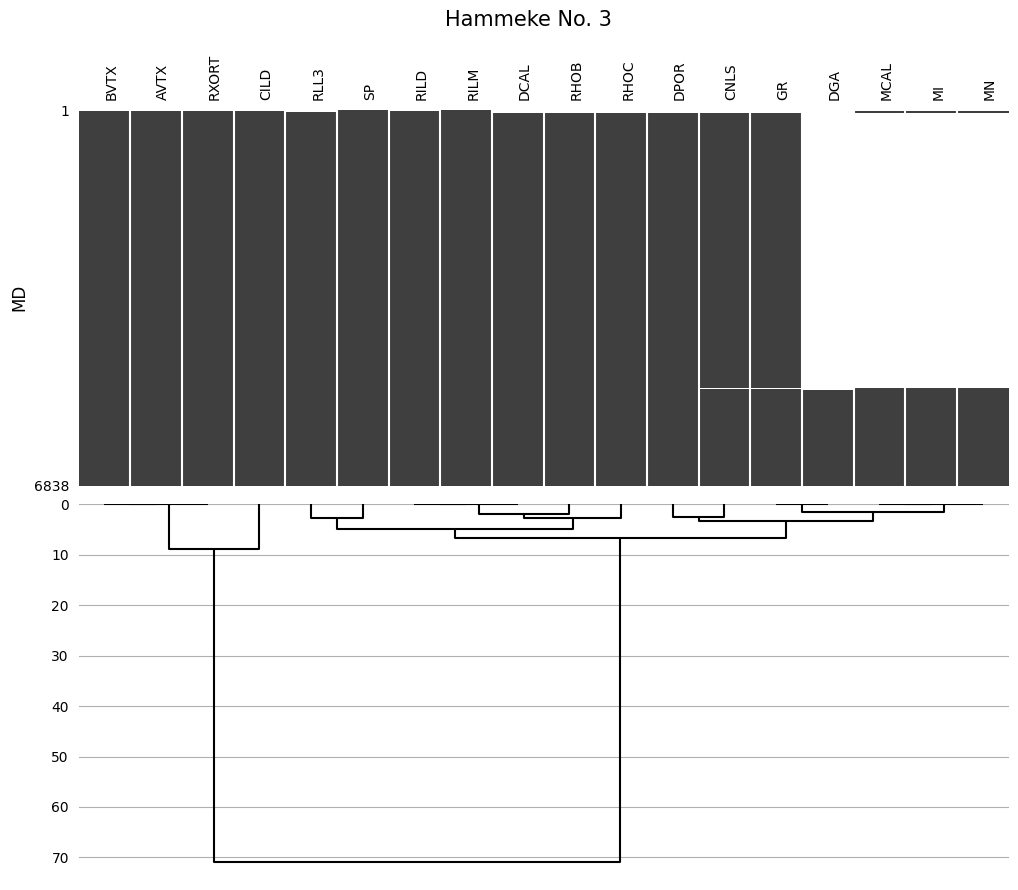

In [10]:
well_path = '../v1.0_rawdata/1045146404.las'
plot_dendromatrix(well_path)

*Archivo pos-filtrado*

/home/pokinux/anaconda3/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:2848: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([dvw, 0])


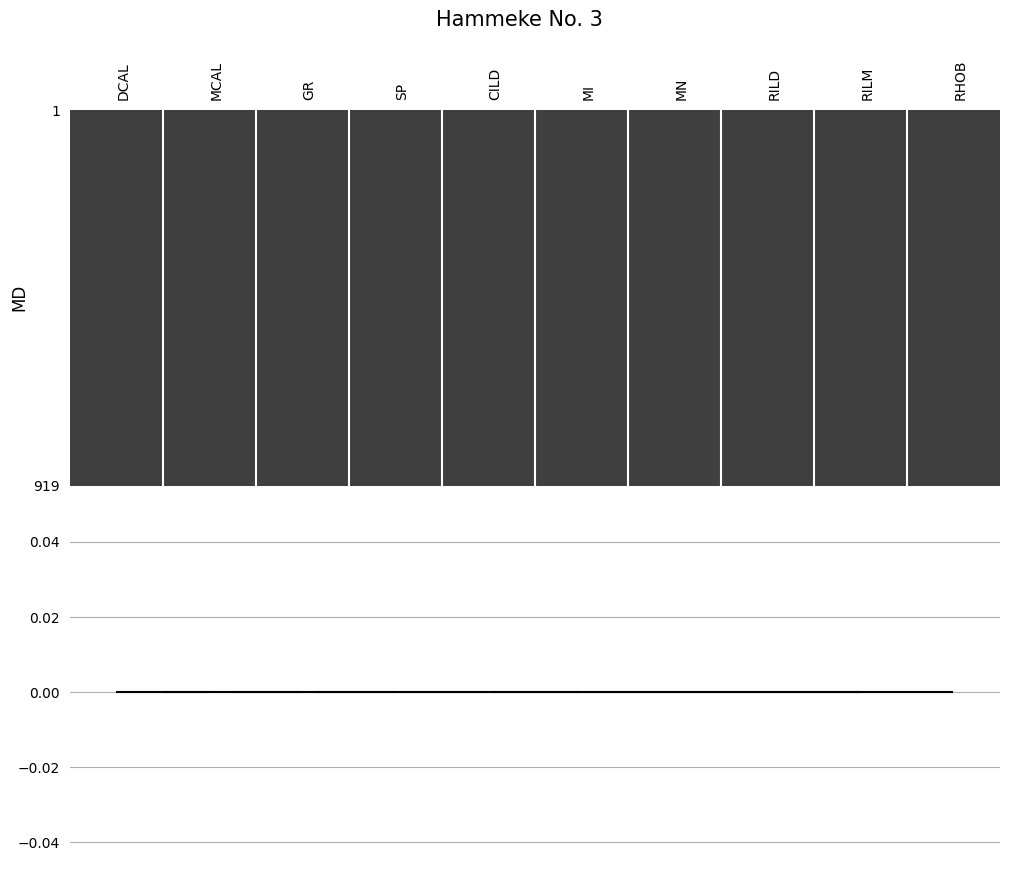

In [84]:
well_path_new = r'../v1.3_filter_invalid_data/Hammeke No. 3.las'
plot_dendromatrix(well_path_new)

(<module 'matplotlib.pyplot' from '/home/pokinux/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>,
 <Figure size 1200x1000 with 3 Axes>)

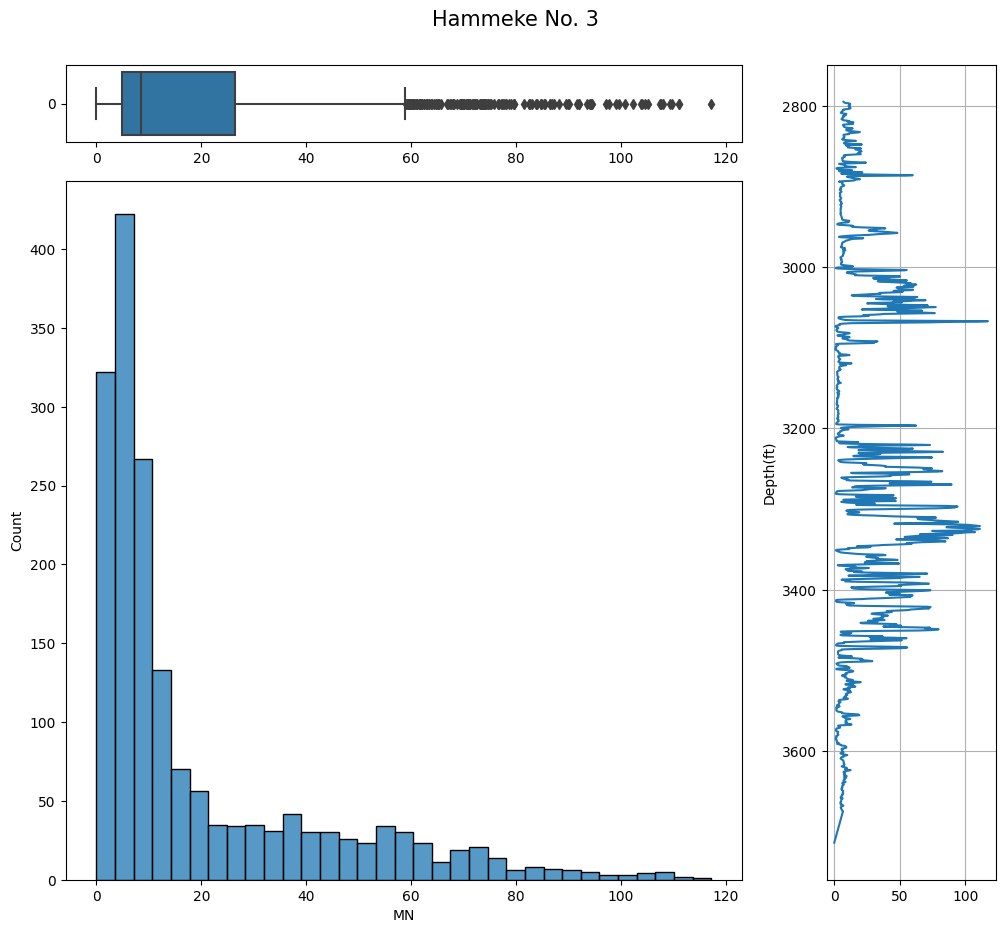

In [85]:
def main_plot(well_path, log):

  # las processing
  las = lasio.read(well_path)
  # get well name form las file
  name = las.well['WELL'].value
  df = las.df().reset_index()
  depth = df['DEPT']
  log = df[log]

  # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
  fig = plt.figure(figsize=(12, 10))
  fig.suptitle(name, fontsize=15)
  # DELETE GAP BETWeen suptitle and subplots
  fig.subplots_adjust(top=0.925, wspace=0.3, hspace=0.3)
  rows = 2
  columns = 2
  grid = plt.GridSpec(rows, columns, wspace = .20, hspace = .10, width_ratios=(.80, .20), height_ratios=(.10, .9))
  
  ## plotting log
  plt.subplot(grid[:, 1])
  plt.plot(log, depth)
  plt.subplot(grid[:, 1]).invert_yaxis()
  plt.subplot(grid[:, 1]).set_ylabel("Depth(ft)")
  plt.subplot(grid[:, 1]).grid()

  ## assigning a seaborn graph to correspond ax
  # boxplot
  sns.boxplot(log, ax=plt.subplot(grid[0, 0]), orient='h')
  plt.subplot(grid[0, 0]).set(xlabel='') # Remove x axis name for the boxplot

  # histplot
  sns.histplot(x=log, ax=plt.subplot(grid[1, 0]))
  return plt, fig

# Input log name
log = 'MN'
main_plot(well_path_new, log)


*Quality data, checking unities, and data present in logs*

In [36]:
import welly.quality as q
path = r'../v1.3_filter_invalid_data/'
las_file_list = las_list(path)
p = welly.read_las(las_file_list)

tests = {
    'All': [q.no_similarities],
    'Each': [q.no_gaps, q.no_monotonic, q.no_flat],
}

73it [00:09,  8.00it/s]


In [72]:
# Eval caliper
from IPython.display import HTML
HTML(p.curve_table_html(keys=alias['Caliper'], alias=alias, tests=tests))

Idx,UWI,Data,Passing,DCAL,MCAL,MELCAL
,,,%,72/73 wells,48/73 wells,14/73 wells
0,,1/7 curves,100,DCAL⬤2.31 in,⬤,⬤
1,,2/10 curves,100,DCAL⬤4.90 IN,⬤,MELCAL⬤7.99 IN
2,,2/11 curves,100,DCAL⬤8.83 IN,MCAL⬤8.57 IN,⬤
3,,2/10 curves,100,DCAL⬤7.34 IN,⬤,MELCAL⬤8.19 IN
4,,2/10 curves,100,DCAL⬤8.22 GAPI,MCAL⬤8.33 GAPI,⬤
5,15-185-23755-0000,2/9 curves,100,DCAL⬤8.16 in,⬤,MELCAL⬤8.17 in
6,,2/10 curves,100,DCAL⬤8.08 GAPI,MCAL⬤8.07 GAPI,⬤
7,,2/10 curves,100,DCAL⬤8.38 IN,MCAL⬤8.44 IN,⬤
8,,2/10 curves,100,DCAL⬤8.40 GAPI,MCAL⬤8.25 GAPI,⬤


*Al menos dos registros caliper en cada pozo*  
*Check unidades (posible mal label GAPI?)*

In [38]:
# Eval resistivity logs
from IPython.display import HTML
HTML(p.curve_table_html(keys=['Gamma', 'SP', 'Sonic',
     'Density', 'Neutron'], alias=alias, tests=tests))

Idx,UWI,Data,Passing,Gamma*,SP*,Sonic*,Density*,Neutron*
,,,%,73/73 wells,73/73 wells,26/73 wells,70/73 wells,3/73 wells
0,,3/7 curves,100,GR⬤69.45 GAPI,SP⬤-70.20 mV,⬤,RHOB⬤2.11 g/cc,⬤
1,,4/10 curves,100,GR⬤67.37 GAPI,SP⬤48.46 MV,DT⬤72.22 USEC/FT,RHOB⬤2.43 G/CC,⬤
2,,4/11 curves,100,GR⬤66.56 GAPI,SP⬤-55.79 MV,DT⬤74.77 USEC/FT,RHOB⬤2.48 G/CC,⬤
3,,4/10 curves,100,GR⬤61.40 GAPI,SP⬤11.63 MV,DT⬤80.70 USEC/FT,RHOB⬤2.37 G/CC,⬤
4,,3/10 curves,100,GR⬤64.41,SP⬤-63.21,⬤,RHOB⬤2.48,⬤
5,15-185-23755-0000,3/9 curves,100,GR⬤68.38 GAPI,SP⬤31.50 mV,⬤,RHOB⬤2.57 g/cc,⬤
6,,3/10 curves,100,GR⬤62.89,SP⬤-78.08 MV,⬤,RHOB⬤2.58,⬤
7,,3/10 curves,100,GR⬤73.92 GAPI,SP⬤-70.24 MV,⬤,RHOB⬤2.56 G/CC,⬤
8,,3/10 curves,100,GR⬤60.50,SP⬤-474.37 mV,⬤,RHOB⬤2.56,⬤


> [!IMPORTANT]  
> Neutron presente con dos unidades NAPI y PU 

*Registro de densidad faltante en pocos pozos --> buena opcion para predecir en el primer modelo*  
*Registro sonico ideal para un segundo modelo*

In [39]:
# Eval resistivity logs
from IPython.display import HTML
HTML(p.curve_table_html(keys=alias['Resistive'], alias=alias, tests=tests))

Idx,UWI,Data,Passing,CILD,MI,MN,RILD,RILM,MEL15,MEL20
,,,%,55/73 wells,48/73 wells,48/73 wells,72/73 wells,72/73 wells,14/73 wells,14/73 wells
0,,3/7 curves,83,CILD⬤245.74 mmho-m,⬤,⬤,RILD⬤2293513661.44 Ohm-m,RILM⬤1257175748.84 Ohm-m,⬤,⬤
1,,4/10 curves,100,⬤,⬤,⬤,RILD⬤9.55 OHM-M,RILM⬤11.64 OHM-M,MEL15⬤13.10 OHM-M,MEL20⬤12.33 OHM-M
2,,5/11 curves,100,CILD⬤235.30 OHM-M,MI⬤22.97 OHM-M,MN⬤22.41 OHM-M,RILD⬤10.12 OHM-M,RILM⬤10.37 OHM-M,⬤,⬤
3,,4/10 curves,100,⬤,⬤,⬤,RILD⬤9.60 OHM-M,RILM⬤10.33 OHM-M,MEL15⬤11.74 OHM-M,MEL20⬤12.74 OHM-M
4,,5/10 curves,100,CILD⬤175.52,MI⬤7.96,MN⬤9.28,RILD⬤26.42,RILM⬤30.60,⬤,⬤
5,15-185-23755-0000,4/9 curves,100,⬤,⬤,⬤,RILD⬤10.98 Ohm-m,RILM⬤11.39 Ohm-m,MEL15⬤9.60 Ohm-m,MEL20⬤8.07 Ohm-m
6,,5/10 curves,100,CILD⬤148.26,MI⬤34.09,MN⬤20.70,RILD⬤16.53,RILM⬤19.82,⬤,⬤
7,,5/10 curves,100,CILD⬤122.20 OHM-M,MI⬤29.65 OHM-M,MN⬤28.57 OHM-M,RILD⬤18.81 OHM-M,RILM⬤20.51 OHM-M,⬤,⬤
8,,5/10 curves,100,CILD⬤197.81,MI⬤18.10,MN⬤15.45,RILD⬤21.96,RILM⬤23.51,⬤,⬤


*Ser cuidadoso con la seleccion de registros seleccionados*  
*filtrar de manera inteligente cuales registros son los adecuales para entrenar el modelo*

*Ahora se procede a filtrar graficar todos los registros por pozo para identificar pasos a realizar:*
*folder: v1.3.1_filter_invalid_data_plots*

In [23]:
import os
import random
import matplotlib.pyplot as plt
import lasio
import numpy as np

def plot_logs(las, alias):
    # Get available curves in the LAS file
    available_curves = [curve.mnemonic for curve in las.curves]

    # Filter curves according to alias
    curves_to_plot = {}
    for log_type, logs in alias.items():
        curves = [curve for curve in logs if curve in available_curves]
        if curves:
            curves_to_plot[log_type] = curves

    # Determine number of subplots and initialize plot
    n_subplots = len(curves_to_plot)
    fig, axes = plt.subplots(1, n_subplots, figsize=(20, 16), sharey=True)

    # Plot each curve type in a separate subplot
    for i, (log_type, curves) in enumerate(curves_to_plot.items()):
        # Get depth and well name
        depth = las['DEPT']
        well_name = las.well['WELL'].value

        # Initialize the subplot
        ax = axes[i] if n_subplots > 1 else axes
        ax.set_xlabel(log_type)
        ax.set_ylabel('Depth (ft or m)')
        ax.set_title(log_type, fontsize=10)

        # Plot each curve
        for curve in curves:
            log_data = las[curve]
            if log_type == 'Resistive':
                ax.semilogx(log_data, depth, label=curve)
            else:
                ax.plot(log_data, depth, label=curve)

        # Set plot properties
        ax.set_ylim(max(depth), min(depth))  # Invert y-axis
        ax.legend()
        ax.grid(axis='y')
    
        # Set well name at the top
    fig.suptitle(well_name, fontsize=20, y=0.95)
    
    return fig

# # Define the LAS files folder and alias for logs
# source_folder = '../v1.3_filter_invalid_data/'
# destination_folder = '../v1.3_filter_invalid_data_plots/'

# # Get the LAS files in the source folder
# las_files = [file for file in os.listdir(source_folder) if file.lower().endswith('.las')]

# # Iterate through the LAS files and plot each well
# for file in las_files:
#     las = lasio.read(os.path.join(source_folder, file))
#     plot_logs(las, alias)

#     # Save plot in a separate folder with well name as filename
    
#     plot_filename = os.path.splitext(file)[0] + '.png'
#     plot_path = os.path.join(destination_folder, plot_filename)
#     plt.savefig(plot_path)

#     # Clear plot for next iteration
#     plt.clf()

In [58]:
# # delete files in '../v1.3_filter_invalid_data_plots/'
# import os
# import shutil

# folder = '../v1.3_filter_invalid_data_plots/'
# for filename in os.listdir(folder):
#     file_path = os.path.join(folder, filename)
#     try:
#         if os.path.isfile(file_path) or os.path.islink(file_path):
#             os.unlink(file_path) # os.remove(file_path)
#         elif os.path.isdir(file_path):
#             shutil.rmtree(file_path)
#     except Exception as e:
#         print('Failed to delete %s. Reason: %s' % (file_path, e))

*Se detectaron registros con calipers negativos se procede a eliminarlos, se re-ajsutan los archivos y se crea una nueva rama de trabajo con estos ajustes.*

In [ ]:
# Define the LAS files folder and alias for logs
source_folder = '../v1.3.1_filter_invalid_data/'
destination_folder = '../v1.3.1_filter_invalid_data_plots/'

# Get the LAS files in the source folder
las_files = [file for file in os.listdir(source_folder) if file.lower().endswith('.las')]

# Iterate through the LAS files and plot each well
for file in las_files:
    las = lasio.read(os.path.join(source_folder, file))
    plot_logs(las, alias)

    # Save plot in a separate folder with well name as filename
    
    plot_filename = os.path.splitext(file)[0] + '.png'
    plot_path = os.path.join(destination_folder, plot_filename)
    plt.savefig(plot_path)

    # Clear plot for next iteration
    plt.clf()

Petrophysical data from well logs can have a variety of characteristics depending on the context and specific variables involved. Based on your requirements, I would suggest trying several outlier detection methods and compare their results to see which one is most suitable for your data. The methods I previously mentioned are all applicable, but some might be more appropriate depending on the data characteristics:

Standard Deviation Method: This method assumes a normal distribution of the data. If the petrophysical data you are working with follows a normal distribution, this can be a simple and effective method.

Interquartile Range (IQR) Method: This method is less sensitive to extreme values compared to the standard deviation method, making it more robust for data with skewed distributions or heavy tails.

Z-score Method: Similar to the standard deviation method, the z-score method assumes a normal distribution. It measures how far a data point is from the mean in terms of standard deviations. This method might be suitable if your data follows a normal distribution.

Isolation Forest: This is an unsupervised learning algorithm that can handle multi-dimensional data. It works well with large datasets and can handle noise in the data. This method could be suitable if your petrophysical data has multiple variables and a large number of data points.

Local Outlier Factor (LOF): LOF is an unsupervised method that works well with multi-dimensional data. It measures the local density deviation of a data point compared to its neighbors. This method might be suitable if your data has clusters or varying densities.

One-Class SVM: One-Class SVM is another unsupervised method that works well with multi-dimensional data. It is particularly effective in high-dimensional spaces, but it can be sensitive to the choice of kernel and other hyperparameters. You might need to experiment with different hyperparameters to get the best results for your data.

It's important to understand the characteristics of your petrophysical data and choose the outlier detection methods accordingly. You can try multiple methods and compare their results to find the best approach for your specific dataset. Keep in mind that preprocessing, such as normalization or standardization, might also be necessary depending on the chosen method.

In [2]:
# Ya estan los registros seleccionados y toda la data invalida eliminada, ahora se procede a detectar outliers

import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
import os

# avoid warning 
import warnings
warnings.filterwarnings('ignore')

def BP_method(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)]

def SD_method(df, column, threshold=3):
    mean = np.mean(df[column])
    std_dev = np.std(df[column])
    return df[(df[column] < mean - threshold * std_dev) | (df[column] > mean + threshold * std_dev)]

def IQR_method(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)]

def ZS_method(df, column, threshold=3):
    mean = np.mean(df[column])
    std_dev = np.std(df[column])
    df['z_score'] = (df[column] - mean) / std_dev
    return df[np.abs(df['z_score']) > threshold]

def IF_method(df, contamination=0.1):
    isolation_forest = IsolationForest(contamination=contamination)
    labels = isolation_forest.fit_predict(df)
    return df[labels == -1]

def LOF_method(df, n_neighbors=5, contamination=0.1):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=contamination)
    labels = lof.fit_predict(df)
    return df[labels == -1]

def OCSVM_method(df, nu=0.1, kernel='rbf', gamma='scale'):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    one_class_svm = OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
    labels = one_class_svm.fit_predict(scaled_data)
    return df[labels == -1]

alias = {
    'Caliper': ['DCAL', 'MCAL', 'MELCAL'],
    "Gamma": ['GR', 'GRGM'],
    "SP": ['SP'],
    "Resistive": ['CILD', 'MI', 'MN', 'RILD', 'RILM', 'MEL15', 'MEL20'],
    "Sonic": ['DT'],
    "Density": ['RHOB'],
    'Neutron': ['NEU', 'NPHI', 'NPOR'],
}

# Add or remove methods as needed, with short names as keys
methods_to_use = [
    #BP_method,
    #SD_method,
    #IQR_method,
    #ZS_method,
    IF_method,
    LOF_method,
    #OCSVM_method,
]


*Graficos generales para todos los tracks presentes en el .las file*
*graficos muy sobrecargado mejor realizar indivualemnte de acuerdo al tipo de registro*

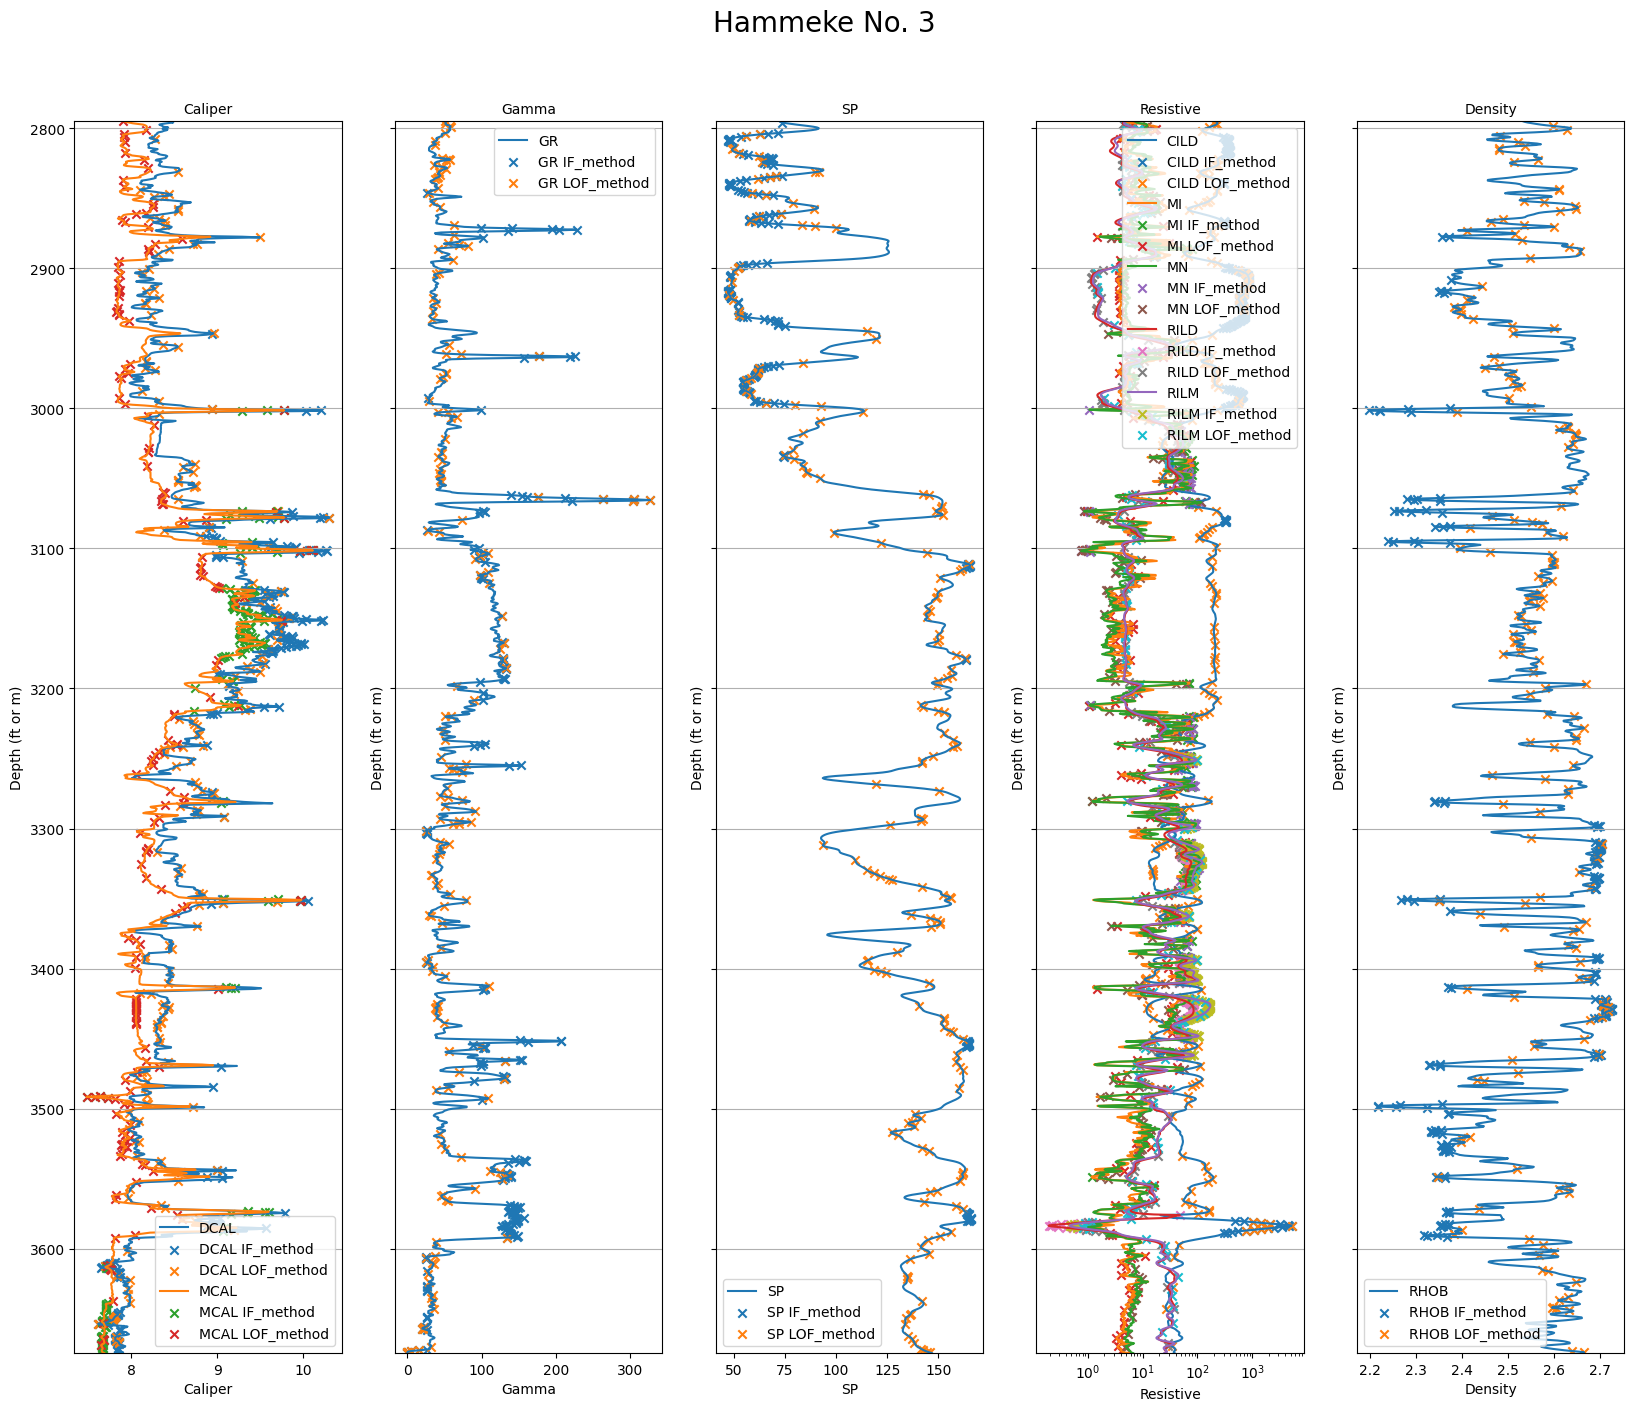

In [98]:
def plot_logs_with_outliers(las, alias, outlier_methods, df_outliers):
    # Get available curves in the LAS file
    available_curves = [curve.mnemonic for curve in las.curves]

    # Filter curves according to alias
    curves_to_plot = {}
    for log_type, logs in alias.items():
        curves = [curve for curve in logs if curve in available_curves]
        if curves:
            curves_to_plot[log_type] = curves

    # Determine number of subplots and initialize plot
    n_subplots = len(curves_to_plot)
    fig, axes = plt.subplots(1, n_subplots, figsize=(20, 16), sharey=True)

    # Plot each curve type in a separate subplot
    for i, (log_type, curves) in enumerate(curves_to_plot.items()):
        # Get depth and well name
        depth = las['DEPT']
        well_name = las.well['WELL'].value

        # Initialize the subplot
        ax = axes[i] if n_subplots > 1 else axes
        ax.set_xlabel(log_type)
        ax.set_ylabel('Depth (ft or m)')
        ax.set_title(log_type, fontsize=10)

        # Plot each curve
        for curve in curves:
            log_data = las[curve]
            if log_type == 'Resistive':
                ax.semilogx(log_data, depth, label=curve)
            else:
                ax.plot(log_data, depth, label=curve)

            # Scatter plot for outliers
            for method in outlier_methods:
                outlier_data = df_outliers[method.__name__].get(curve)
                if outlier_data is not None:
                    ax.scatter(outlier_data, outlier_data.index, label=f"{curve} {method.__name__}", marker='x')

        # Set plot properties
        ax.set_ylim(max(depth), min(depth))  # Invert y-axis
        ax.legend()
        ax.grid(axis='y')

    # Set well name at the top
    fig.suptitle(well_name, fontsize=20, y=0.95)

    return fig

def detect_outliers(data, methods_to_use, alias):
    outlier_results = {}
    for method in methods_to_use:
        method_name = method.__name__
        outlier_results[method_name] = {}
        for log_type, curves in alias.items():
            for curve in curves:
                if curve in data.columns:
                    # Asegúrate de pasar los argumentos correctos a las funciones de detección de outliers
                    if method_name == "IF_method":
                        outliers = method(data[[curve]], contamination=0.1)
                    elif method_name == "LOF_method":
                        outliers = method(data[[curve]], n_neighbors=5, contamination=0.1)
                    elif method_name == "OCSVM_method":
                        outliers = method(data[[curve]], nu=0.1, kernel='rbf', gamma='scale')
                    elif method_name == "BP_method":
                        outliers = method(data, curve)
                    elif method_name == "SD_method":
                        outliers = method(data, curve)
                    elif method_name == "IQR_method":
                        outliers = method(data, curve)
                    elif method_name == "ZS_method":
                        outliers = method(data, curve)
                    else:
                        outliers = method(data[[curve]])

                    # Verificar si la columna 'curve' existe en 'outliers' antes de acceder a ella
                    if curve in outliers.columns:
                        outlier_results[method_name][curve] = outliers[curve]

    return outlier_results

# Get the LAS files in the source folder
well_path_new = r'../v1.3.1_filter_invalid_data/Hammeke No. 3.las'
las = lasio.read(well_path_new)
data = las.df()

# Detect outliers and plot results
outlier_results = detect_outliers(data, methods_to_use, alias)
fig = plot_logs_with_outliers(las, alias, methods_to_use, outlier_results)

*por tipo de registro*

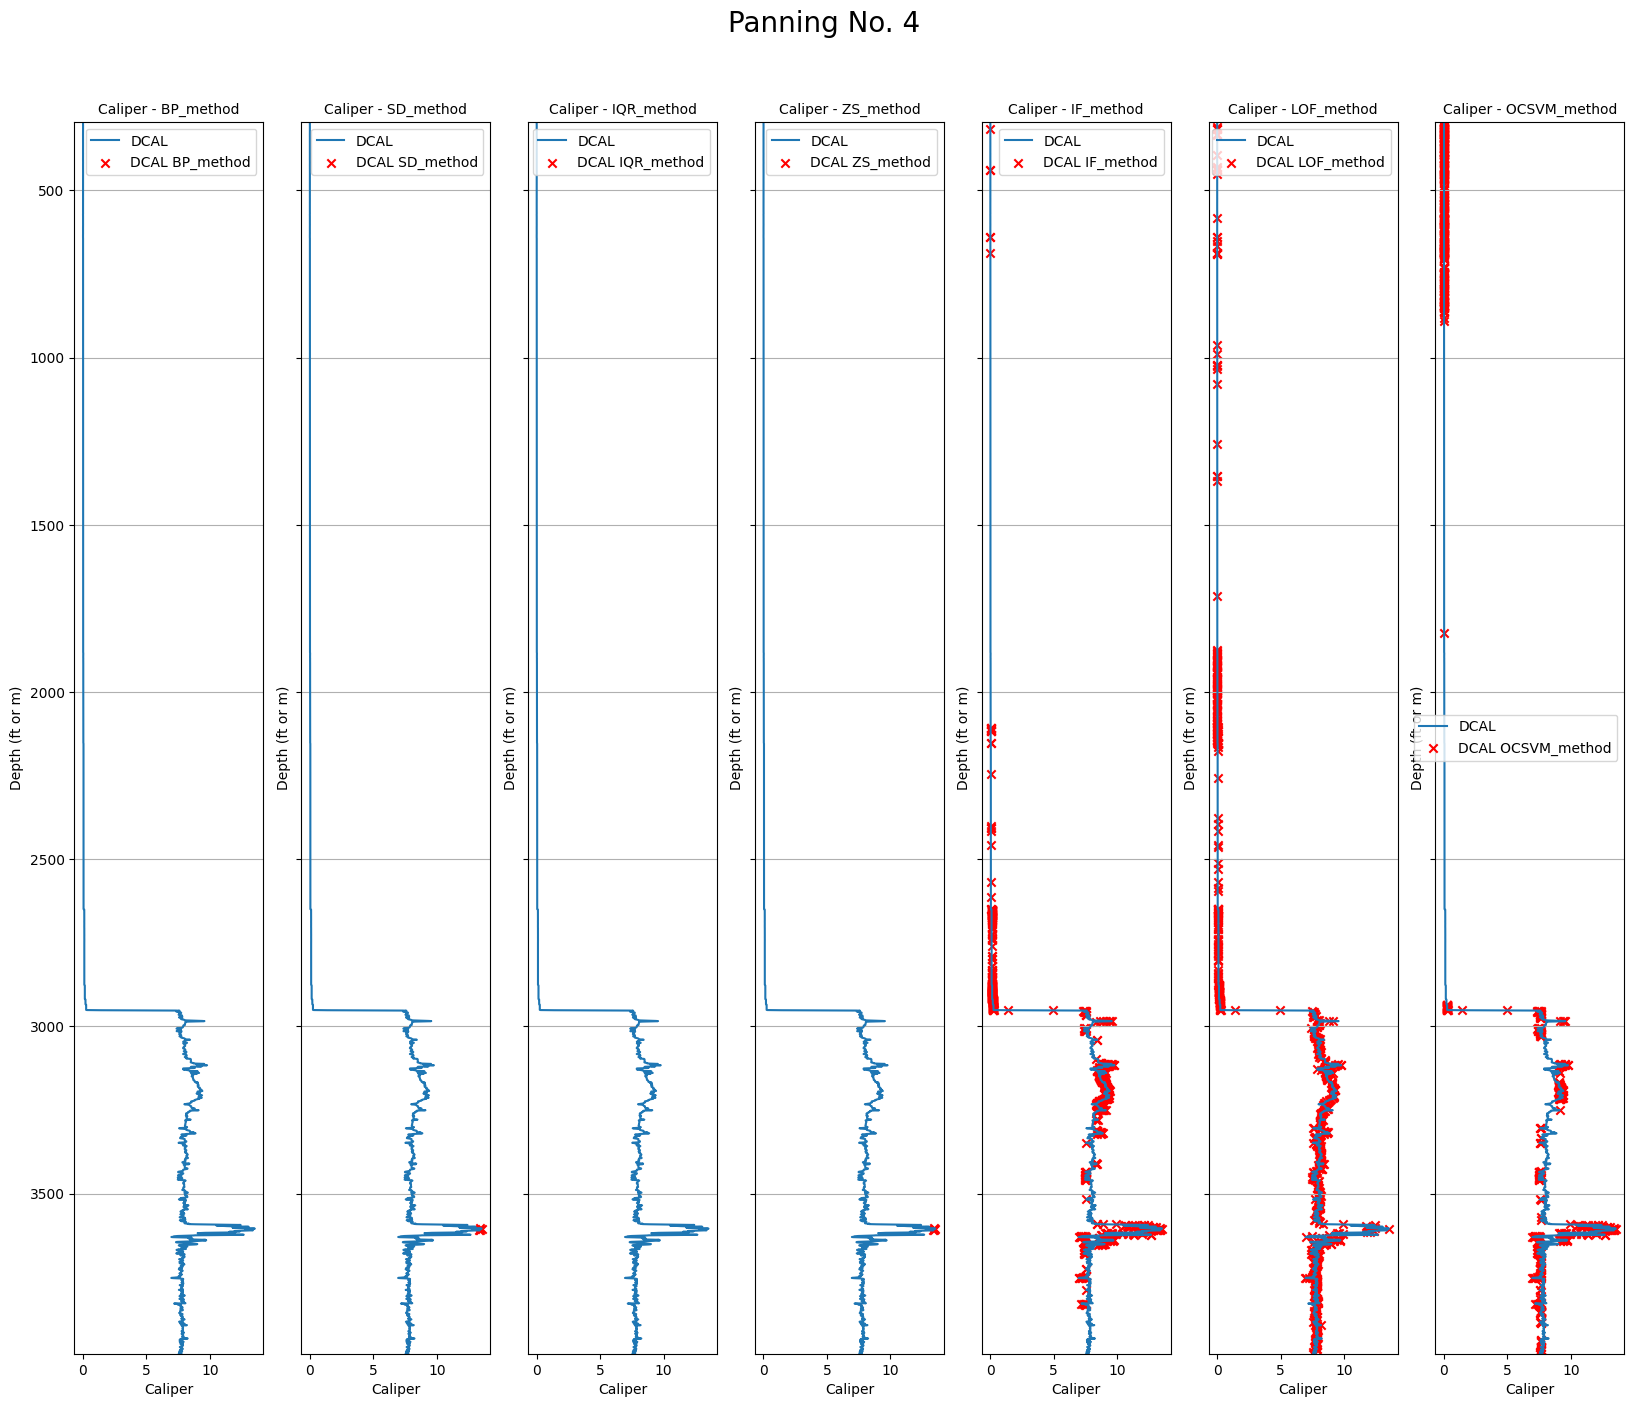

In [89]:
def plot_logs_with_outliers_by_method(las, alias, outlier_methods, df_outliers):
    # Get available curves in the LAS file
    available_curves = [curve.mnemonic for curve in las.curves]

    # Filter curves according to alias
    curves_to_plot = {}
    for log_type, logs in alias.items():
        curves = [curve for curve in logs if curve in available_curves]
        if curves:
            curves_to_plot[log_type] = curves

    if not curves_to_plot:
        return None

    # Determine number of subplots and initialize plot
    n_subplots = len(outlier_methods)
    fig, axes = plt.subplots(len(curves_to_plot), n_subplots, figsize=(20, 16), sharey=True)

    # Plot each curve type in a separate subplot
    for i, (log_type, curves) in enumerate(curves_to_plot.items()):
        # Get depth and well name
        depth = las['DEPT']
        well_name = las.well['WELL'].value

        for j, method in enumerate(outlier_methods):
            # Initialize the subplot
            ax = axes[i, j] if len(curves_to_plot) > 1 and n_subplots > 1 else axes[j]
            ax.set_xlabel(log_type)
            ax.set_ylabel('Depth (ft or m)')
            ax.set_title(f"{log_type} - {method.__name__}", fontsize=10)

            # Plot each curve
            for curve in curves:
                log_data = las[curve]
                if log_type == 'Resistive':
                    ax.semilogx(log_data, depth, label=curve)
                else:
                    ax.plot(log_data, depth, label=curve)

                # Scatter plot for outliers
                outlier_data = df_outliers[method.__name__].get(curve)
                if outlier_data is not None:
                    ax.scatter(outlier_data, outlier_data.index, label=f"{curve} {method.__name__}", marker='x', color='red')

            # Set plot properties
            ax.set_ylim(max(depth), min(depth))  # Invert y-axis
            ax.legend()
            ax.grid(axis='y')

        # Set well name at the top
        fig.suptitle(well_name, fontsize=20, y=0.95)

    return fig

# Create a new alias dictionary with only Caliper logs
alias_caliper = {
    'Caliper': alias['Caliper']
}

# Call the plot_logs_with_outliers_subplots function with the updated alias dictionary
fig = plot_logs_with_outliers_by_method(las, alias_caliper, methods_to_use, outlier_results)

In [71]:
source_folder = '../v1.3.1_filter_invalid_data/'
destination_folder = '../v1.3.2_outlier_detection_methods/'

import os

def create_subfolders(destination_folder, alias):
    for log_type in alias.keys():
        subfolder = os.path.join(destination_folder, log_type)
        if not os.path.exists(subfolder):
            os.makedirs(subfolder)

create_subfolders(destination_folder, alias)

In [72]:
# Create a new alias dictionary with each log
alias_caliper = {
    'Caliper': alias['Caliper']
}

alias_gamma = {
    'Gamma': alias['Gamma']
}

alias_sp = {
    'SP': alias['SP']
}

alias_resistive = {
    'Resistive': alias['Resistive']
}

alias_sonic = {
    'Sonic': alias['Sonic']
}

alias_density = {
    'Density': alias['Density']
}

alias_neutron = {
    'Neutron': alias['Neutron']
}


In [91]:
import os
from lasio import read
import matplotlib.pyplot as plt

alias_dicts = {
    'Caliper': alias_caliper,
    'Gamma': alias_gamma,
    'SP': alias_sp,
    'Resistive': alias_resistive,
    'Sonic': alias_sonic,
    'Density': alias_density,
    'Neutron': alias_neutron
}

# Function to save the plots in destination_folder
def save_plot_to_folder(fig, filename, log_type):
    if fig is None:
        return

    destination_subfolder = os.path.join(destination_folder, log_type)
    os.makedirs(destination_subfolder, exist_ok=True)
    fig.savefig(os.path.join(destination_subfolder, f"{filename}.png"))
    plt.close(fig)

# Process LAS files in the source_folder
for file in os.listdir(source_folder):
    if file.endswith(".las"):
        # Read the LAS file
        las_file_path = os.path.join(source_folder, file)
        las = read(las_file_path)

        # Calculate outliers
        data = las.df()
        outlier_results = detect_outliers(data, methods_to_use, alias)

        # Plot and save graphics for each log type
        for log_type, alias_dict in alias_dicts.items():
            fig = plot_logs_with_outliers_by_method(las, alias_dict, methods_to_use, outlier_results)
            save_plot_to_folder(fig, os.path.splitext(file)[0], log_type)


# PIPELINE DE DETECCION DE OUTLIERS

In [93]:
import os
import welly
import lasio
import numpy as np
from welly import Well
from collections import defaultdict

def remove_outliers(well_df, outlier_results):
    # Identify rows where all methods agree on the outlier status
    common_outliers = defaultdict(list)
    for method_name, curve_outliers in outlier_results.items():
        for curve, outlier_data in curve_outliers.items():
            common_outliers[curve].append(set(outlier_data.index))

    # Remove rows with common outliers
    for curve, outlier_sets in common_outliers.items():
        intersection = set.intersection(*outlier_sets)
        well_df = well_df.drop(well_df.index[well_df.index.isin(intersection)])

    return well_df

source_folder = '../v1.3.1_filter_invalid_data/'
destination_folder = '../v1.4_outliers_deleted/'

# Iterate through all .las files in the source folder
for file in os.listdir(source_folder):
    if file.endswith('.las'):
        file_path = os.path.join(source_folder, file)

        # read las file
        las = lasio.read(file_path, null_policy='common')
        # make a dataframe from las file
        well_df = las.df()

        # Detect outliers
        outlier_results = detect_outliers(well_df, methods_to_use, alias)

        # Remove outliers
        new_well_df = remove_outliers(well_df, outlier_results)

        # set lasio from dataframe
        las.set_data(new_well_df)

        # set well from lasio
        well = welly.Well.from_lasio(las)
                        
        # Save the new .las file
        new_file_path = os.path.join(destination_folder, file)

        # save las file
        well.to_las(new_file_path, keys=keep_curves, fmt='%.4f',
                    column_fmt={0: '%.2f'}, mnemonics_header=True)

        # Print well name, original shape, outliers detected, and new shape
        well_name = las.well['WELL'].value
        print(f"Well name: {well_name}")
        print(f"Original shape: {well_df.shape}")
        print(f"Outliers detected: {len(well_df) - len(new_well_df)}")
        print(f"New shape: {new_well_df.shape}")
        print()

Only engine='normal' can read wrapped files
Only engine='normal' can read wrapped files


Well name: Panning No. 4
Original shape: (7368, 7)
Outliers detected: 626
New shape: (6742, 7)



Only engine='normal' can read wrapped files


Well name: KD #1
Original shape: (2392, 10)
Outliers detected: 286
New shape: (2106, 10)



Only engine='normal' can read wrapped files


Well name: Rank OWWO #1-2
Original shape: (2751, 11)
Outliers detected: 298
New shape: (2453, 11)



Only engine='normal' can read wrapped files


Well name: JAS #1-34
Original shape: (2389, 10)
Outliers detected: 269
New shape: (2120, 10)



Only engine='normal' can read wrapped files


Well name: Sara #1
Original shape: (265, 10)
Outliers detected: 60
New shape: (205, 10)



Only engine='normal' can read wrapped files


Well name: SCHLOCHTERMEIER #2-24
Original shape: (2245, 9)
Outliers detected: 224
New shape: (2021, 9)



Only engine='normal' can read wrapped files


Well name: Peace Creek #C-1
Original shape: (2735, 10)
Outliers detected: 316
New shape: (2419, 10)



Only engine='normal' can read wrapped files


Well name: Quivira Ranch #3-34
Original shape: (1618, 10)
Outliers detected: 184
New shape: (1434, 10)



Only engine='normal' can read wrapped files


Well name: Rudy D No 1
Original shape: (1873, 10)
Outliers detected: 208
New shape: (1665, 10)



Only engine='normal' can read wrapped files


Well name: Heyen #2-27
Original shape: (1749, 11)
Outliers detected: 201
New shape: (1548, 11)



Only engine='normal' can read wrapped files


Well name: Hullman #1-14
Original shape: (2070, 11)
Outliers detected: 240
New shape: (1830, 11)



Only engine='normal' can read wrapped files


Well name: Kitzmiller #1-33
Original shape: (1558, 11)
Outliers detected: 166
New shape: (1392, 11)



Only engine='normal' can read wrapped files


Well name: QUIVERA RANCH #2-34
Original shape: (1801, 10)
Outliers detected: 199
New shape: (1602, 10)



Only engine='normal' can read wrapped files


Well name: AUSTIN #1-5
Original shape: (7642, 10)
Outliers detected: 859
New shape: (6783, 10)



Only engine='normal' can read wrapped files


Well name: Heyen No. 4
Original shape: (1705, 10)
Outliers detected: 185
New shape: (1520, 10)



Only engine='normal' can read wrapped files


Well name: ELWELL #4
Original shape: (4790, 11)
Outliers detected: 537
New shape: (4253, 11)



Only engine='normal' can read wrapped files


Well name: ANDREWS #22-1
Original shape: (6106, 10)
Outliers detected: 744
New shape: (5362, 10)



Only engine='normal' can read wrapped files


Well name: Peace Creek Unit No.10-03
Original shape: (6913, 7)
Outliers detected: 648
New shape: (6265, 7)



Only engine='normal' can read wrapped files


Well name: Ross No. 4
Original shape: (1417, 10)
Outliers detected: 161
New shape: (1256, 10)



Only engine='normal' can read wrapped files


Well name: SARA SW #1
Original shape: (2016, 10)
Outliers detected: 228
New shape: (1788, 10)



Only engine='normal' can read wrapped files


Well name: Mary Ann #1-14
Original shape: (2375, 10)
Outliers detected: 231
New shape: (2144, 10)



Only engine='normal' can read wrapped files


Well name: Diana No. 2
Original shape: (2749, 7)
Outliers detected: 210
New shape: (2539, 7)



Only engine='normal' can read wrapped files


Well name: Hildebrand #1
Original shape: (6813, 8)
Outliers detected: 578
New shape: (6235, 8)



Only engine='normal' can read wrapped files


Well name: NORMAN KLEPPER A NO.1
Original shape: (1692, 11)
Outliers detected: 210
New shape: (1482, 11)



Only engine='normal' can read wrapped files


Well name: Quivira Ranch No. 6-34
Original shape: (1630, 10)
Outliers detected: 185
New shape: (1445, 10)



Only engine='normal' can read wrapped files


Well name: Gatton ' C ' No. 2
Original shape: (1661, 11)
Outliers detected: 209
New shape: (1452, 11)



Only engine='normal' can read wrapped files


Well name: 
Original shape: (6490, 10)
Outliers detected: 833
New shape: (5657, 10)



Only engine='normal' can read wrapped files


Well name: #1-27 PAGE OWWO
Original shape: (2661, 9)
Outliers detected: 230
New shape: (2431, 9)



Only engine='normal' can read wrapped files


Well name: Hammeke No. 3
Original shape: (1757, 10)
Outliers detected: 195
New shape: (1562, 10)



Only engine='normal' can read wrapped files


Well name: JTT #1-24
Original shape: (2369, 11)
Outliers detected: 293
New shape: (2076, 11)



Only engine='normal' can read wrapped files


Well name: Howard #1
Original shape: (1886, 10)
Outliers detected: 198
New shape: (1688, 10)



Only engine='normal' can read wrapped files


Well name: FSI No.6
Original shape: (2177, 10)
Outliers detected: 272
New shape: (1905, 10)



Only engine='normal' can read wrapped files


Well name: WILSON #23-27
Original shape: (3446, 10)
Outliers detected: 336
New shape: (3110, 10)



Only engine='normal' can read wrapped files


Well name: Lloyd No. 2
Original shape: (1969, 11)
Outliers detected: 208
New shape: (1761, 11)



Only engine='normal' can read wrapped files


Well name: DeWERFF #1
Original shape: (2044, 9)
Outliers detected: 216
New shape: (1828, 9)



Only engine='normal' can read wrapped files


Well name: AC Widener Farms No.1
Original shape: (1887, 10)
Outliers detected: 195
New shape: (1692, 10)



Only engine='normal' can read wrapped files


Well name: Randy No. 3
Original shape: (1960, 10)
Outliers detected: 223
New shape: (1737, 10)



Only engine='normal' can read wrapped files


Well name: East Kirkpatrick Unit No. 1-1
Original shape: (2163, 10)
Outliers detected: 233
New shape: (1930, 10)



Only engine='normal' can read wrapped files


Well name: Allen #15
Original shape: (3671, 6)
Outliers detected: 275
New shape: (3396, 6)



Only engine='normal' can read wrapped files


Well name: JAN NO.3
Original shape: (6842, 7)
Outliers detected: 609
New shape: (6233, 7)



Only engine='normal' can read wrapped files


Well name: David #1-9
Original shape: (2263, 11)
Outliers detected: 254
New shape: (2009, 11)



Only engine='normal' can read wrapped files


Well name: Milton OWWO No.1-20
Original shape: (2748, 11)
Outliers detected: 340
New shape: (2408, 11)



Only engine='normal' can read wrapped files


Well name: Spangenberg No. 4
Original shape: (1700, 10)
Outliers detected: 192
New shape: (1508, 10)



Only engine='normal' can read wrapped files


Well name: QUIVERA RANCH #1-34
Original shape: (1606, 10)
Outliers detected: 240
New shape: (1366, 10)



Only engine='normal' can read wrapped files


Well name: Wallace No.1
Original shape: (1747, 10)
Outliers detected: 185
New shape: (1562, 10)



Only engine='normal' can read wrapped files


Well name: ALAN NW #1
Original shape: (1343, 9)
Outliers detected: 153
New shape: (1190, 9)



Only engine='normal' can read wrapped files


Well name: Hearn-Debes No. 1
Original shape: (2003, 11)
Outliers detected: 237
New shape: (1766, 11)



Only engine='normal' can read wrapped files


Well name: AC Widener Farms #3
Original shape: (6786, 7)
Outliers detected: 506
New shape: (6280, 7)



Only engine='normal' can read wrapped files


Well name: Tonn A No.3
Original shape: (2575, 10)
Outliers detected: 264
New shape: (2311, 10)



Only engine='normal' can read wrapped files


Well name: Gatton #4
Original shape: (4527, 6)
Outliers detected: 279
New shape: (4248, 6)



Only engine='normal' can read wrapped files


Well name: REWERTS #1-27
Original shape: (6953, 10)
Outliers detected: 776
New shape: (6177, 10)



Only engine='normal' can read wrapped files


Well name: Byers D No 5
Original shape: (2311, 11)
Outliers detected: 270
New shape: (2041, 11)



Only engine='normal' can read wrapped files


Well name: FISHER #1-23
Original shape: (7140, 10)
Outliers detected: 767
New shape: (6373, 10)



Only engine='normal' can read wrapped files


Well name: Tonn  # 1
Original shape: (6663, 7)
Outliers detected: 453
New shape: (6210, 7)



Only engine='normal' can read wrapped files


Well name: Ruth Russell # 2
Original shape: (2366, 10)
Outliers detected: 265
New shape: (2101, 10)



Only engine='normal' can read wrapped files


Well name: HUNLEY #1-20
Original shape: (2057, 9)
Outliers detected: 193
New shape: (1864, 9)



Only engine='normal' can read wrapped files


Well name: Gatton "C" No. 4
Original shape: (1961, 10)
Outliers detected: 221
New shape: (1740, 10)



Only engine='normal' can read wrapped files


Well name: FSI #5
Original shape: (2353, 10)
Outliers detected: 248
New shape: (2105, 10)



Only engine='normal' can read wrapped files


Well name: SPANGENBER-BAUER #1
Original shape: (1913, 10)
Outliers detected: 233
New shape: (1680, 10)



Only engine='normal' can read wrapped files


Well name: Quivira Ranch No.4-34
Original shape: (1619, 10)
Outliers detected: 185
New shape: (1434, 10)



Only engine='normal' can read wrapped files


Well name: Dudrey #1
Original shape: (2468, 11)
Outliers detected: 257
New shape: (2211, 11)



Only engine='normal' can read wrapped files


Well name: Panning No. 3
Original shape: (1786, 10)
Outliers detected: 210
New shape: (1576, 10)



Only engine='normal' can read wrapped files


Well name: McCune 'A' No. 2
Original shape: (1725, 10)
Outliers detected: 183
New shape: (1542, 10)



Only engine='normal' can read wrapped files


Well name: Hullman No. 1 - 15
Original shape: (1974, 11)
Outliers detected: 270
New shape: (1704, 11)



Only engine='normal' can read wrapped files


Well name: Gatton "C" No. 3
Original shape: (1952, 10)
Outliers detected: 177
New shape: (1775, 10)



Only engine='normal' can read wrapped files


Well name: Pound No.1-34
Original shape: (2363, 11)
Outliers detected: 251
New shape: (2112, 11)



Only engine='normal' can read wrapped files


Well name: J. Meyer No. 2-28
Original shape: (2364, 10)
Outliers detected: 256
New shape: (2108, 10)



Only engine='normal' can read wrapped files


Well name: Fritzemeier "B" Unit #1 OWWO
Original shape: (1842, 10)
Outliers detected: 219
New shape: (1623, 10)



Only engine='normal' can read wrapped files


Well name: FRITZEMEIER #2
Original shape: (4332, 6)
Outliers detected: 319
New shape: (4013, 6)



Only engine='normal' can read wrapped files


Well name: Grover No. 3
Original shape: (1670, 10)
Outliers detected: 168
New shape: (1502, 10)



Only engine='normal' can read wrapped files


Well name: Allen #11
Original shape: (3633, 4)
Outliers detected: 163
New shape: (3470, 4)



Only engine='normal' can read wrapped files


Well name: KRANKENBERG #8-19
Original shape: (3325, 10)
Outliers detected: 340
New shape: (2985, 10)

Well name: #1-24 MULL-HEYEN
Original shape: (1837, 9)
Outliers detected: 199
New shape: (1638, 9)



In [99]:
import os
import lasio

source_folder = '../v1.4_outliers_deleted/'

def available_logs(file, alias, source_folder):
    las = lasio.read(os.path.join(source_folder, file))
    present_logs = set()
    
    for curve in las.curves:
        for log_alias, log_mnemonics in alias.items():
            if curve.mnemonic.upper() in log_mnemonics:
                present_logs.add(log_alias)
                
    return tuple(sorted(present_logs))

log_groups = {}

for file in os.listdir(source_folder):
    if file.lower().endswith('.las'):
        log_key = available_logs(file, alias, source_folder)
        if log_key in log_groups:
            log_groups[log_key].append(file)
        else:
            log_groups[log_key] = [file]

for group, files in log_groups.items():
    print(f"Group {group}: {len(files)} files")
    print(files)
    print()


Group ('Caliper', 'Density', 'Gamma', 'Resistive', 'SP'): 44 files
['Panning No. 4.las', 'Sara #1.las', 'SCHLOCHTERMEIER #2-24.las', 'Peace Creek #C-1.las', 'Quivira Ranch #3-34.las', 'Rudy D No 1.las', 'AUSTIN #1-5.las', 'Heyen No. 4.las', 'ANDREWS #22-1.las', 'Peace Creek Unit No.10-03.las', 'Ross No. 4.las', 'Mary Ann #1-14.las', 'Diana No. 2.las', 'Quivira Ranch No. 6-34.las', '.las', '#1-27 PAGE OWWO.las', 'Hammeke No. 3.las', 'Howard #1.las', 'FSI No.6.las', 'DeWERFF #1.las', 'AC Widener Farms No.1.las', 'Randy No. 3.las', 'East Kirkpatrick Unit No. 1-1.las', 'JAN NO.3.las', 'Spangenberg No. 4.las', 'Wallace No.1.las', 'ALAN NW #1.las', 'AC Widener Farms #3.las', 'Tonn A No.3.las', 'REWERTS #1-27.las', 'FISHER #1-23.las', 'Tonn  # 1.las', 'Ruth Russell # 2.las', 'Gatton C No. 4.las', 'FSI #5.las', 'Quivira Ranch No.4-34.las', 'Panning No. 3.las', "McCune 'A' No. 2.las", 'Gatton C No. 3.las', 'J. Meyer No. 2-28.las', 'Fritzemeier B Unit #1 OWWO.las', 'FRITZEMEIER #2.las', 'Grover 

In [42]:
import shutil

destination_folder = '../v1.5_clean_data_sonic/'

# Create folders if they don't exist
os.makedirs(os.path.join(destination_folder, 'data'), exist_ok=True)
os.makedirs(os.path.join(destination_folder, 'to_predict'), exist_ok=True)

# Define the groups to be used for different purposes
train_groups = [('Caliper', 'Density', 'Gamma', 'Resistive', 'SP', 'Sonic')]
predict_groups = [('Caliper', 'Density', 'Gamma', 'Resistive', 'SP')]

# Copy files to the respective folders
for group, files in log_groups.items():
    if group in train_groups:
        for file in files:
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, 'data'))
    elif group in predict_groups:
        for file in files:
            shutil.copy(os.path.join(source_folder, file), os.path.join(destination_folder, 'to_predict'))


*La idea principal seria entrenar usando el conjunto de registros antes mencionados y luego usar el modelo para predecir los registros que faltan en los pozos que no tienen todos los registros.  
El primer resgistro a sistetizar seria DT*

#### 2.4. Data preprocessing:
Feature engineering: Extract relevant features from the raw data or create new features that may help the model learn better. This step may involve techniques like dimensionality reduction, feature selection, or feature extraction.
Data normalization: Scale the features to ensure they are on similar scales, making the learning process easier and more stable. Common normalization techniques include min-max scaling, standardization (z-score), or log transformation.
Data encoding: Convert categorical features into numerical format using techniques like one-hot encoding or label encoding.
Sequence padding (for sequence data): If dealing with sequential data (e.g., text or time-series), pad or truncate sequences to a fixed length to ensure consistent input sizes for the model.

Step 2.4: Data preprocessing

Data preprocessing is an important step to prepare the dataset for the deep learning model. It involves transforming the raw data into a suitable format that can be easily understood and processed by the model. Here's a detailed breakdown of this step:

2.4.1. Feature engineering:
a. Dimensionality reduction: Reduce the number of features in the dataset using techniques like Principal Component Analysis (PCA) or Singular Value Decomposition (SVD) while retaining most of the information.
b. Feature selection: Select a subset of the most relevant features using methods like filter-based, wrapper-based, or embedded methods.
c. Feature extraction: Combine or transform existing features to create new, more informative features. For example, in time-series data, you can extract features such as mean, variance, or trend.

*En los registros seleccionados se observan varios caliper por lo que seria ideal dejar uno solo.*

In [1]:
import os
import random
import lasio
import matplotlib.pyplot as plt

source_folder = '../v1.5_clean_data_sonic/data/'

# Choose the log type you want to plot
log_type = 'Caliper'
alias_logs = alias[log_type]

# Number of subplots
n_subplots = 7

# Get the LAS files in the source folder
las_files = [file for file in os.listdir(source_folder) if file.lower().endswith('.las')]

# Select n_subplots files randomly
selected_files = random.sample(las_files, n_subplots)

# Initialize the plot
fig, axes = plt.subplots(1, n_subplots, figsize=(15, 20), sharey=True)

# Iterate through the selected LAS files
for i, file in enumerate(selected_files):
    las = lasio.read(os.path.join(source_folder, file))
    depth = las['DEPT']
    well_name = las.well['WELL'].value

    for curve in las.curves:
        if curve.mnemonic in alias_logs:
            log_data = las[curve.mnemonic]
            axes[i].plot(log_data, depth, label=curve.mnemonic)

    # Set plot properties
    axes[i].set_ylim(max(depth), min(depth))  # Invert y-axis
    axes[i].set_xlabel(log_type)
    axes[i].set_ylabel('Depth (ft or m)')
    axes[i].set_title(well_name, fontsize=10)
    axes[i].legend()
    axes[i].grid(axis='y')

plt.tight_layout()
plt.show()


NameError: name 'alias' is not defined

2.4.2. Data normalization:
a. Min-max scaling: Scale the features to a specific range, usually [0, 1], by subtracting the minimum value and dividing by the range (max-min).
b. Standardization (z-score): Scale the features to have zero mean and unit variance by subtracting the mean and dividing by the standard deviation.
c. Log transformation: Apply logarithmic transformation to the data to reduce the impact of outliers and compress the range of values.

2.4.3. Data encoding:
a. One-hot encoding: Convert categorical features with N distinct categories into N binary features, where each binary feature represents the presence or absence of a specific category.
b. Label encoding: Convert categorical features into integer values by assigning a unique integer to each category. This method is more suitable for ordinal data (i.e., data with a natural order).

2.4.4. Sequence padding (for sequence data):
a. Padding: If dealing with sequential data, such as text or time-series, ensure all sequences have the same length by adding padding tokens (e.g., zeros) to shorter sequences.
b. Truncation: If sequences are too long, truncate them to a fixed length to ensure consistent input sizes for the model.

By applying these preprocessing techniques, you can transform the raw data into a more structured format that can be easily fed into a deep learning model. These steps also help mitigate potential issues such as high-dimensionality, different feature scales, and inconsistent input sizes.


# 2.5. Data augmentation (optional):
Generate more data: Create new samples from the existing dataset by applying transformations that preserve the underlying patterns. This technique is especially useful for image and audio data.
Balance classes: If your dataset has imbalanced classes, augment the underrepresented class to balance the dataset and improve the model's performance on minority classes.

2.6. Data splitting:
Training set: Allocate a large portion of the dataset (e.g., 70-80%) for training the model.
Validation set: Reserve a smaller portion (e.g., 10-15%) for tuning the model and selecting the best hyperparameters.
Test set: Set aside another portion (e.g., 10-15%) for evaluating the model's performance on unseen data.

Once the data is collected, cleaned, preprocessed, and split, you can proceed to the next steps in training your deep learning model.

## Pre-processing. Steps for training a deep learning model

1.  Data cleaning: Clean up the data to remove data. This can include checking for missing values, incorrect formatting, or any data errors. --> check


3.  Feature engineering: Create new variables to improve model performance. This can include one-hot encoding, clustering, dimensionality reduction, and feature engineering.
4.  Feature scaling: Scale the data to the same standard. This can include standardization, normalization, and/or mean-centering.
5.  Data splitting: Split the data into train, validation and test sets.

Data normalization is the process of transforming data into a common format. It is usually used to make the data more useful and easier to analyze.

To perform data normalization, there are several steps you can take:

1.  Identify outliers - these are data points that are significantly different from the average.
2.  Remove outliers - these can distort the data and skew your results, so it is best to delete any outliers from your dataset.
3.  Accurately describe the data - categorize and group the data so that it is easier to understand.
4.  Standardize the data - make sure to use the same format for each data point to ensure accuracy and consistency.
5.  Transform the data - use a variety of techniques to transform the data so that it is normalized. This includes logarithmic transforms, scaling, clustering, etc.
6.  Validate the data - examine the data and make sure it is accurate. This will help ensure that your results are reliable.

Methods to Detect Outliers in Petrophysical Data
------------------------------------------------

There are several commonly used techniques to detect outliers in petrophysical data:

1.  **Z-score**: This method uses the difference between the sample mean and the sample size divided by the sample standard deviation to detect outliers.
2.  **IQR Method**: This technique uses the interquartile range (IQR), or the range between the first and third quartiles of the sample data, to calculate a cutoff point for outliers.
3.  **Replaced Values**: Outliers can be identified easily by comparing replaced values to the original values of the dataset.
4.  **Clustering**: This method uses unsupervised learning techniques to divide data into clusters, then outliers can be identified by comparing the characteristics of the clusters.



### Crossplots

In [139]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

#Create a copy of the dataframe so that the original remanins untouched and extract the required curves
# anomaly_df = df[['wellName', 'MD', 'CALI', 'GR', 'NPHI', 'RHOB', 'RACEHM_l10', 'RACELM_l10', 
#                  'RPCEHM_l10', 'RPCELM_l10', 'PHIF', 'SW', 'VSH']].copy()
anomaly_df = df[inputs].copy()
anomaly_df = anomaly_df[inputs].copy()

#Drop any null values. This method drops the entire row of data if one of the cells in that row
#contains a null (NaN) value
anomaly_df.dropna(inplace=True)

# Define the inputs for the anomaly detection
anomaly_inputs = ['DEPT', 'GR']

# Setup the models, each will have a contamination (outlier) fraction of 0.1
# The random_state is set to allow repeatable results for the Isolation Forest. This can be omitted if required.

outlier_perc = 0.1
model_IF = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(outlier_perc), max_features=1.0, random_state=42)
model_SVM = OneClassSVM(nu=outlier_perc)
model_lof = LocalOutlierFactor(contamination=outlier_perc, novelty=True)

models = {'IF':model_IF, 
         'SVM': model_SVM,
         'LOF': model_lof}

for name, model in models.items():
    print(f'Fitting: {name}')
    model.fit(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly_scores'] = model.decision_function(anomaly_df[anomaly_inputs])
    anomaly_df[f'{name}_anomaly'] = model.predict(anomaly_df[anomaly_inputs])

print('Model Fitting Complete')
#anomaly_df.head(5)

NameError: name 'inputs' is not defined

Outlier Method: IF
Number of anomalous values 184
Number of non anomalous values  1653
Total Number of Values: 1837
Outlier Method: SVM
Number of anomalous values 183
Number of non anomalous values  1654
Total Number of Values: 1837
Outlier Method: LOF
Number of anomalous values 168
Number of non anomalous values  1669
Total Number of Values: 1837


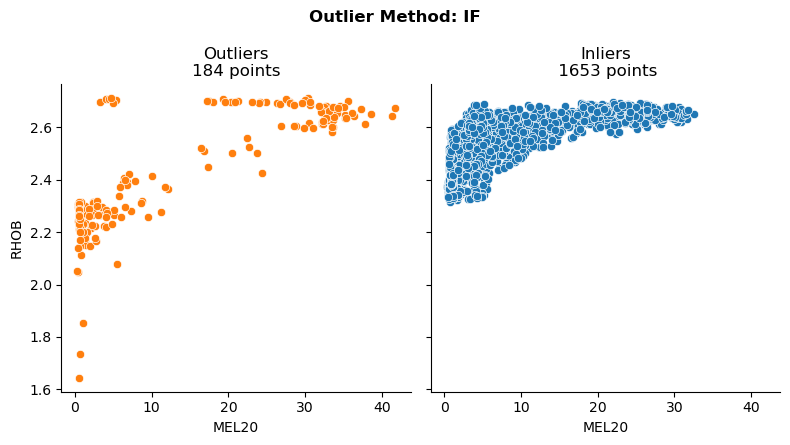

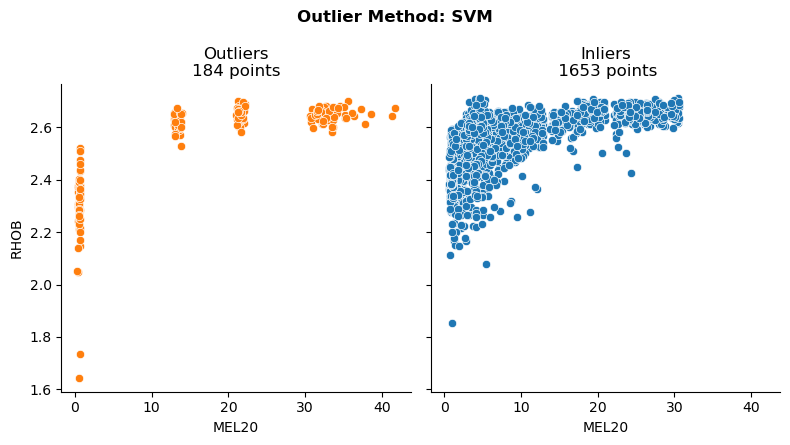

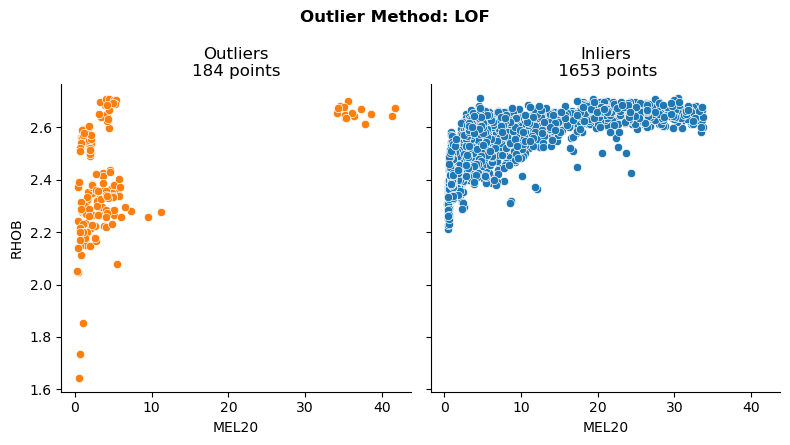

In [365]:
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df, col=method, height=4, hue=method, hue_order=[1,-1])
    g.map(sns.scatterplot, 'MEL20', 'RHOB')
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold')

    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(anomaly_df[anomaly_df['IF_anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(anomaly_df[anomaly_df['IF_anomaly']==  1])} points")

plt.show()

Outlier Method: IF
Number of anomalous values 184
Number of non anomalous values  1653
Total Number of Values: 1837
Outlier Method: SVM
Number of anomalous values 183
Number of non anomalous values  1654
Total Number of Values: 1837
Outlier Method: LOF
Number of anomalous values 168
Number of non anomalous values  1669
Total Number of Values: 1837


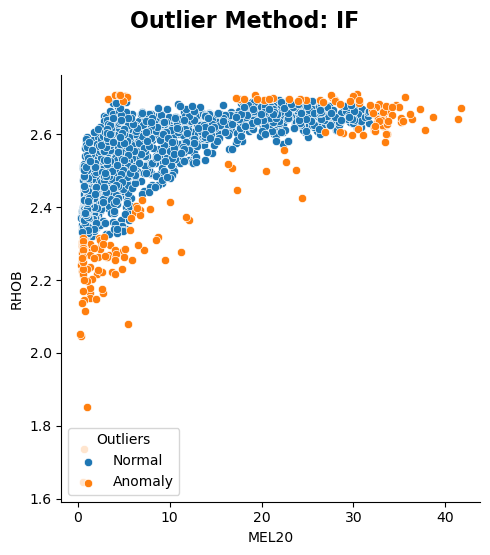

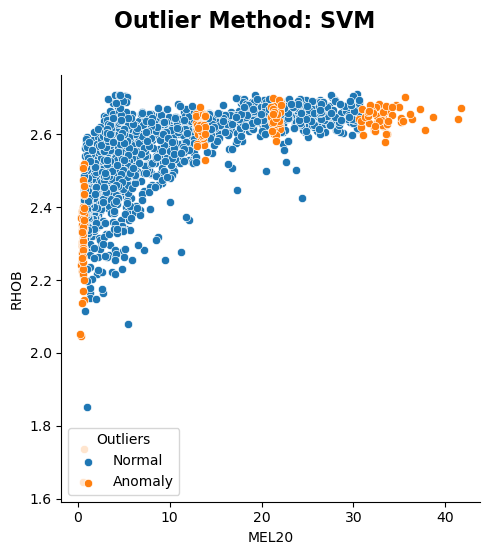

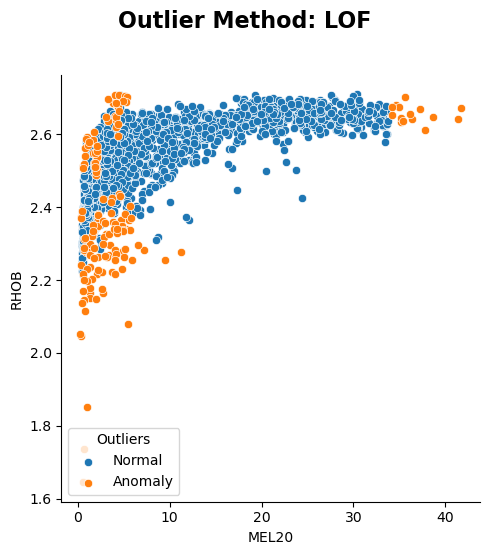

In [366]:
for name in models.keys():
    print(f'Outlier Method: {name}')
    method = f'{name}_anomaly'
    print(f"Number of anomalous values {len(anomaly_df[anomaly_df[method]==-1])}")
    print(f"Number of non anomalous values  {len(anomaly_df[anomaly_df[method]== 1])}")
    print(f'Total Number of Values: {len(anomaly_df)}')

    g = sns.FacetGrid(anomaly_df, hue=method, height=5, hue_order=[1,-1])
    g.map(sns.scatterplot, 'MEL20', 'RHOB')
    
    g.fig.suptitle(f'Outlier Method: {name}', y=1.10, fontweight='bold', fontsize=16)

    axes = g.axes.flatten()
    for ax in axes:
        ax.legend(title='Outliers', loc='lower left', labels=['Normal', 'Anomaly'])

plt.show()

### Log Plots

In [367]:
def create_outlier_plot(wellname, dataframe, curves_to_plot, depth_curve, outlier_method, log_curves=[]):
    num_tracks = len(curves_to_plot)
    
    outlier_shading = dataframe[outlier_method]
    
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    fig.suptitle(f'{wellname}   -   {outlier_method}', fontsize=20, y=1.05)
    
    for i, curve in enumerate(curves_to_plot):
        
        
        ax[i].plot(dataframe[curve], depth_curve)
        
        ax[i].fill_betweenx(depth_curve, dataframe[curve].min(), dataframe[curve].max(), where=outlier_shading>= 1, color='green', alpha=0.2)
        ax[i].fill_betweenx(depth_curve, dataframe[curve].min(), dataframe[curve].max(), where=outlier_shading<= -1, color='red', alpha=0.2)
        
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
        ax[i].grid(which='major', color='lightgrey', linestyle='-')

        
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        
        
    
    plt.tight_layout()
    plt.show()

In [ ]:
df_list = []

#$for lasfile in las_file_list:
las = lasio.read(r'..\Fields\Kansas Fields\ZENITH-PEACE CREEK\v1.3_filter_invalid_data\#1-24 MULL-HEYEN.las')
lasdf = las.df()

lasdf['DEPT'] = lasdf
lasdf['wellName'] = las.well.WELL.value

df_list.append(lasdf)
anomaly_df = pd.concat(df_list, sort=False)

In [346]:
#list(df.columns)
inputs = list(anomaly_df.columns)

In [368]:
#Creating empty lists to story the dataframes and wellnames in
dfs_wells = []
wellnames = []

#Split up the data by well
for well, data in anomaly_df.groupby('wellName'):
    dfs_wells.append(data)
    wellnames.append(well)
    
# Selecting the curves that we want to plot
well = 0
curves_to_plot = inputs

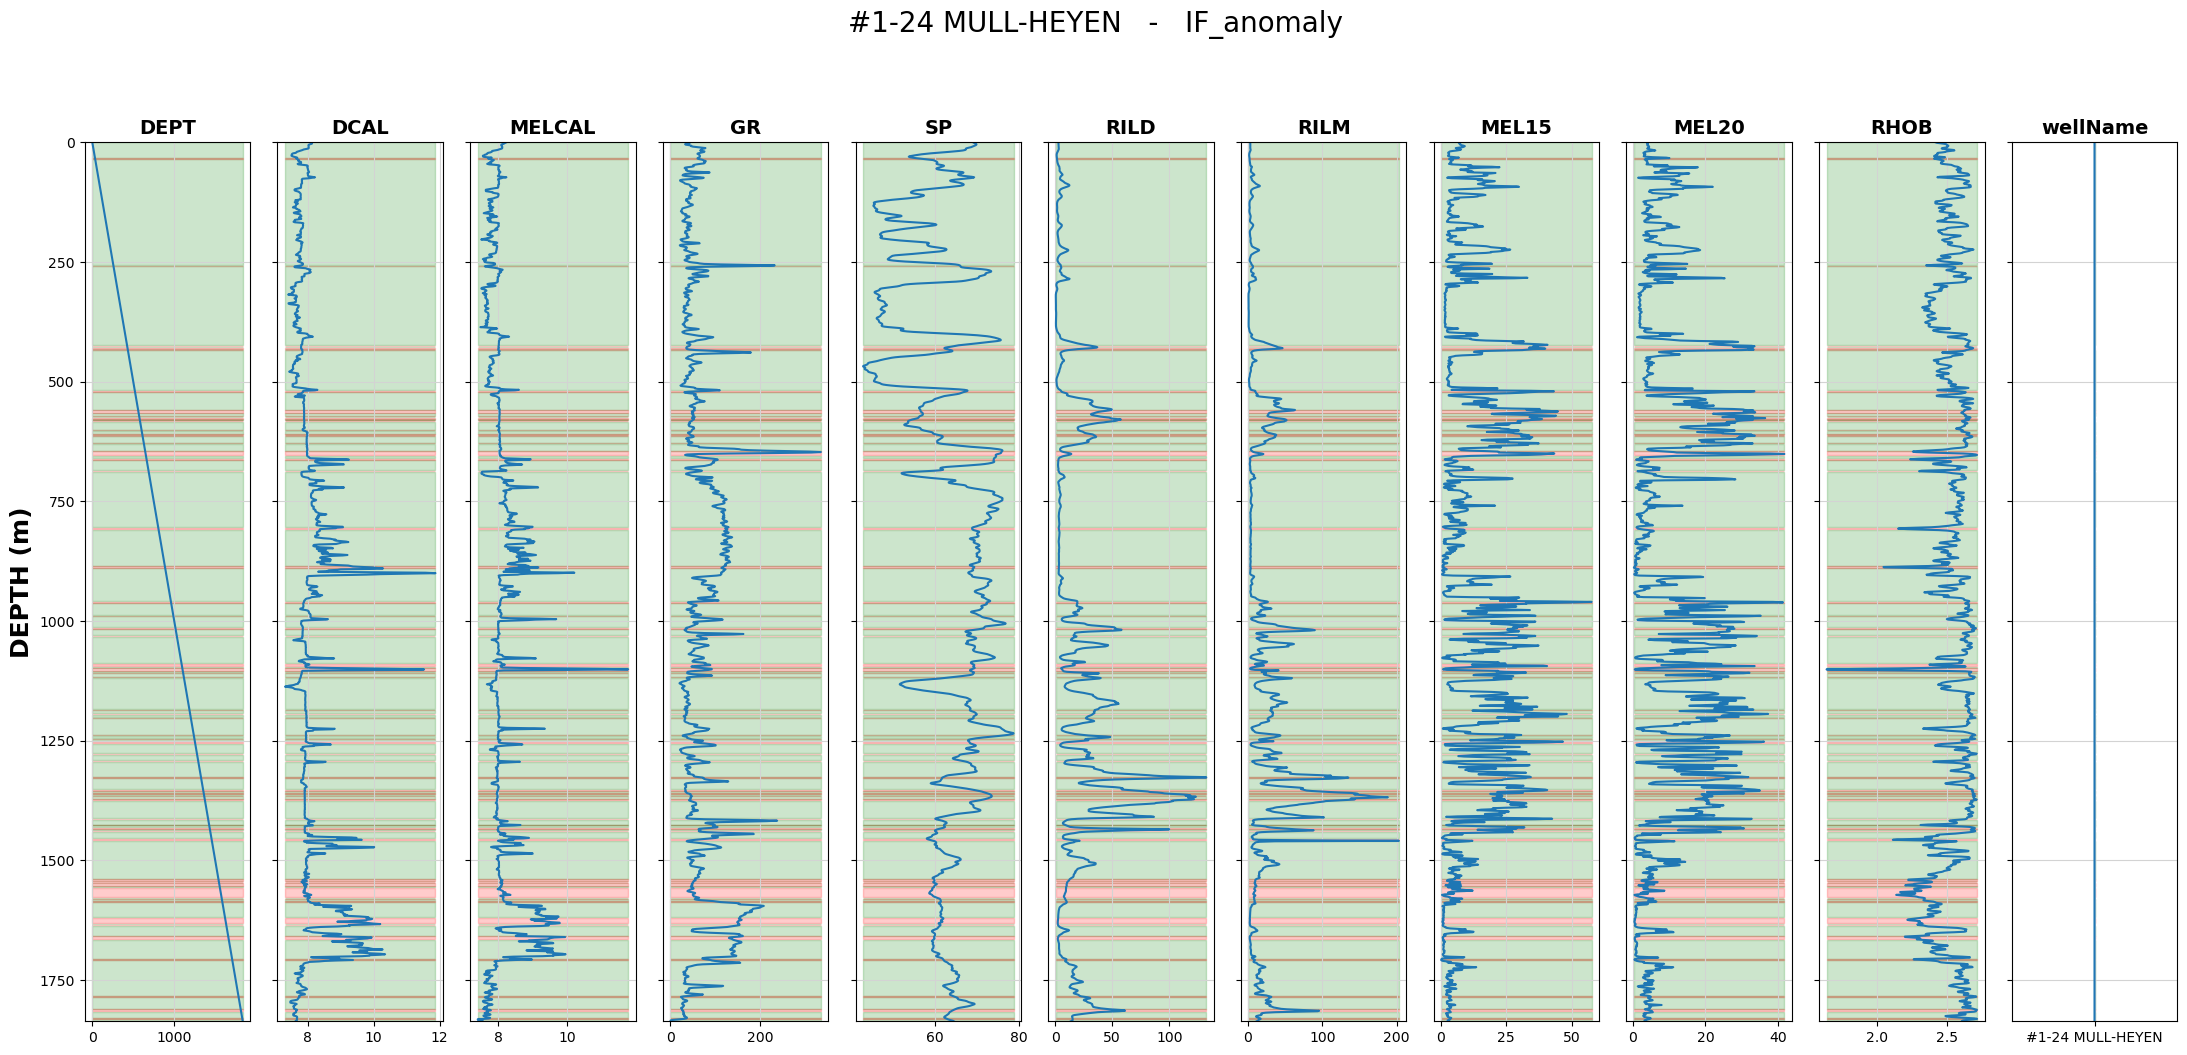

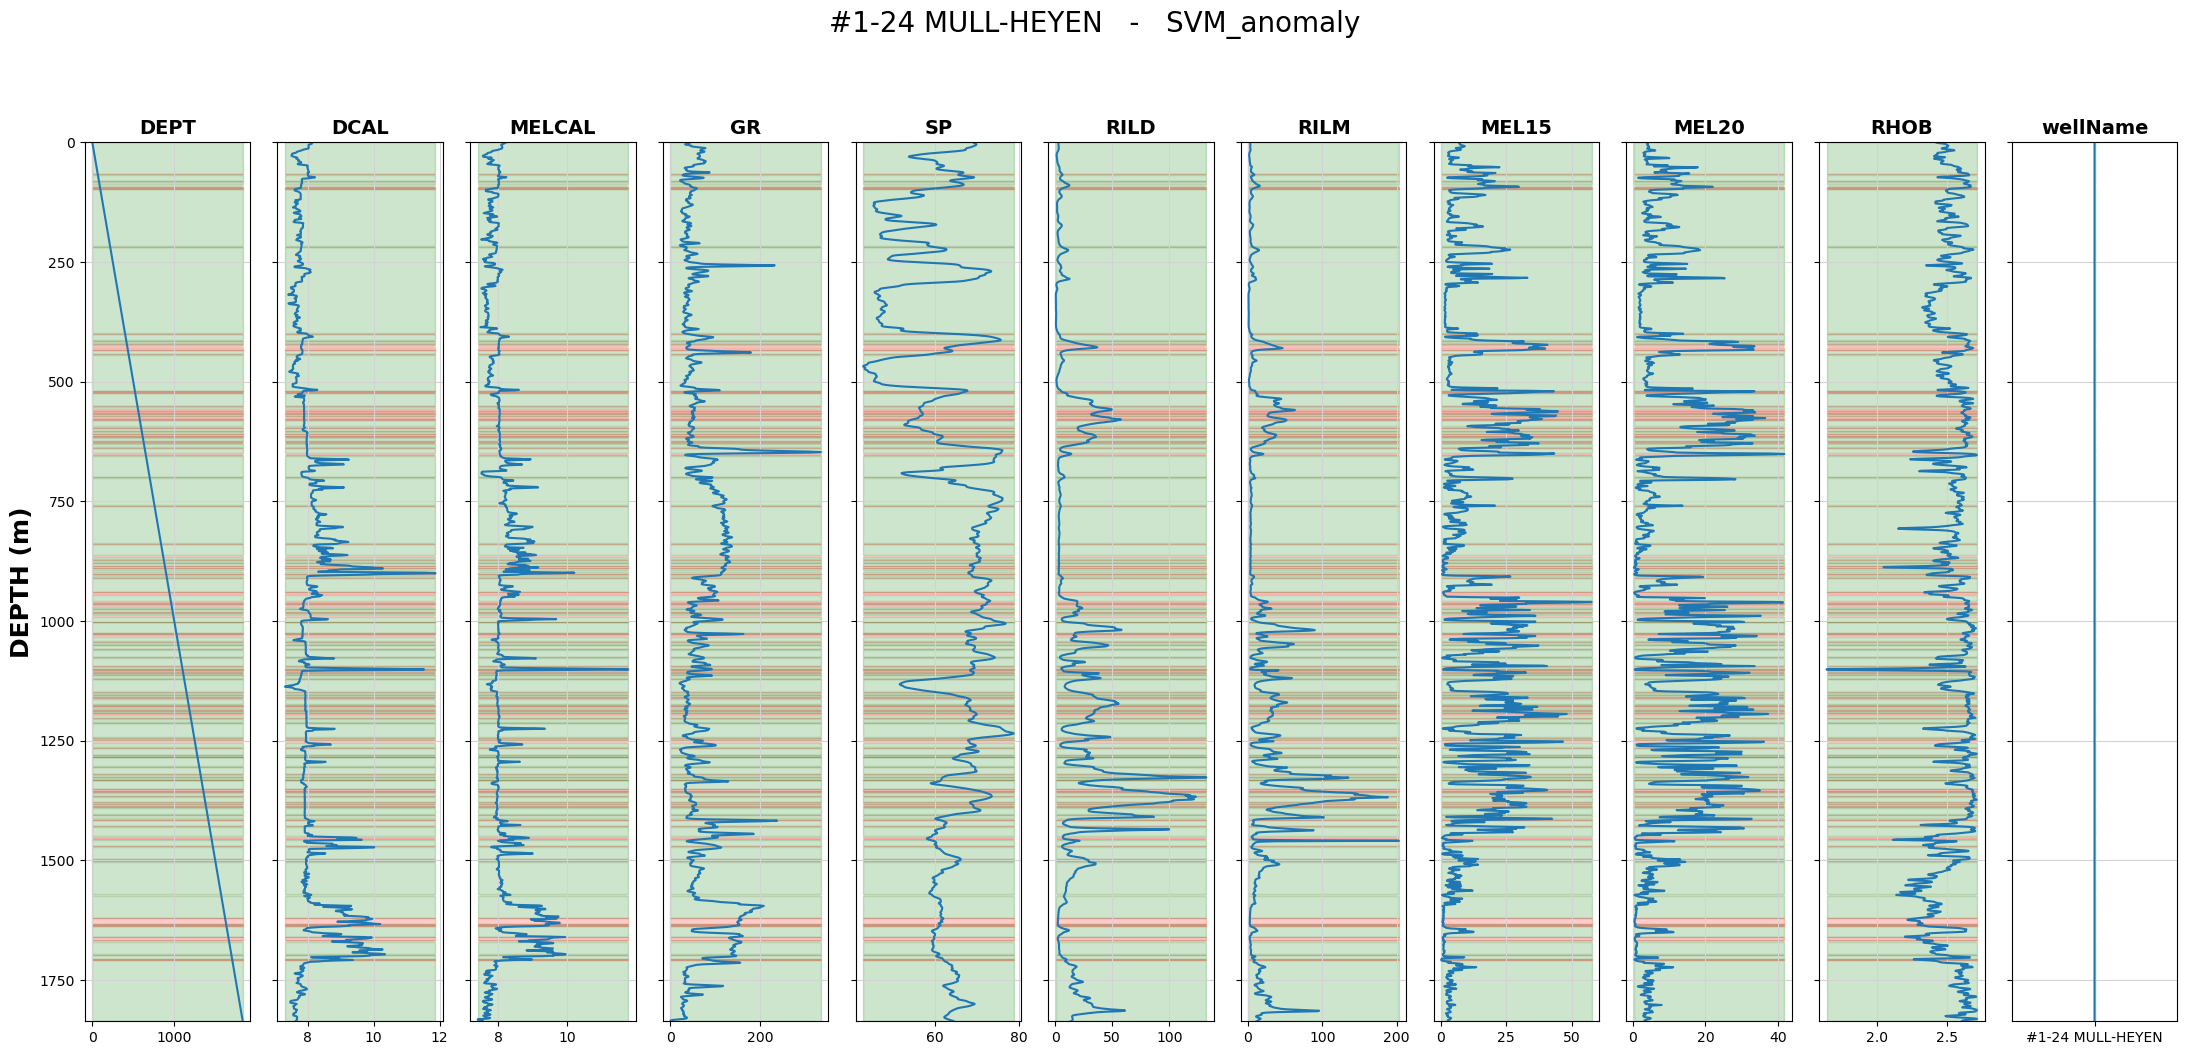

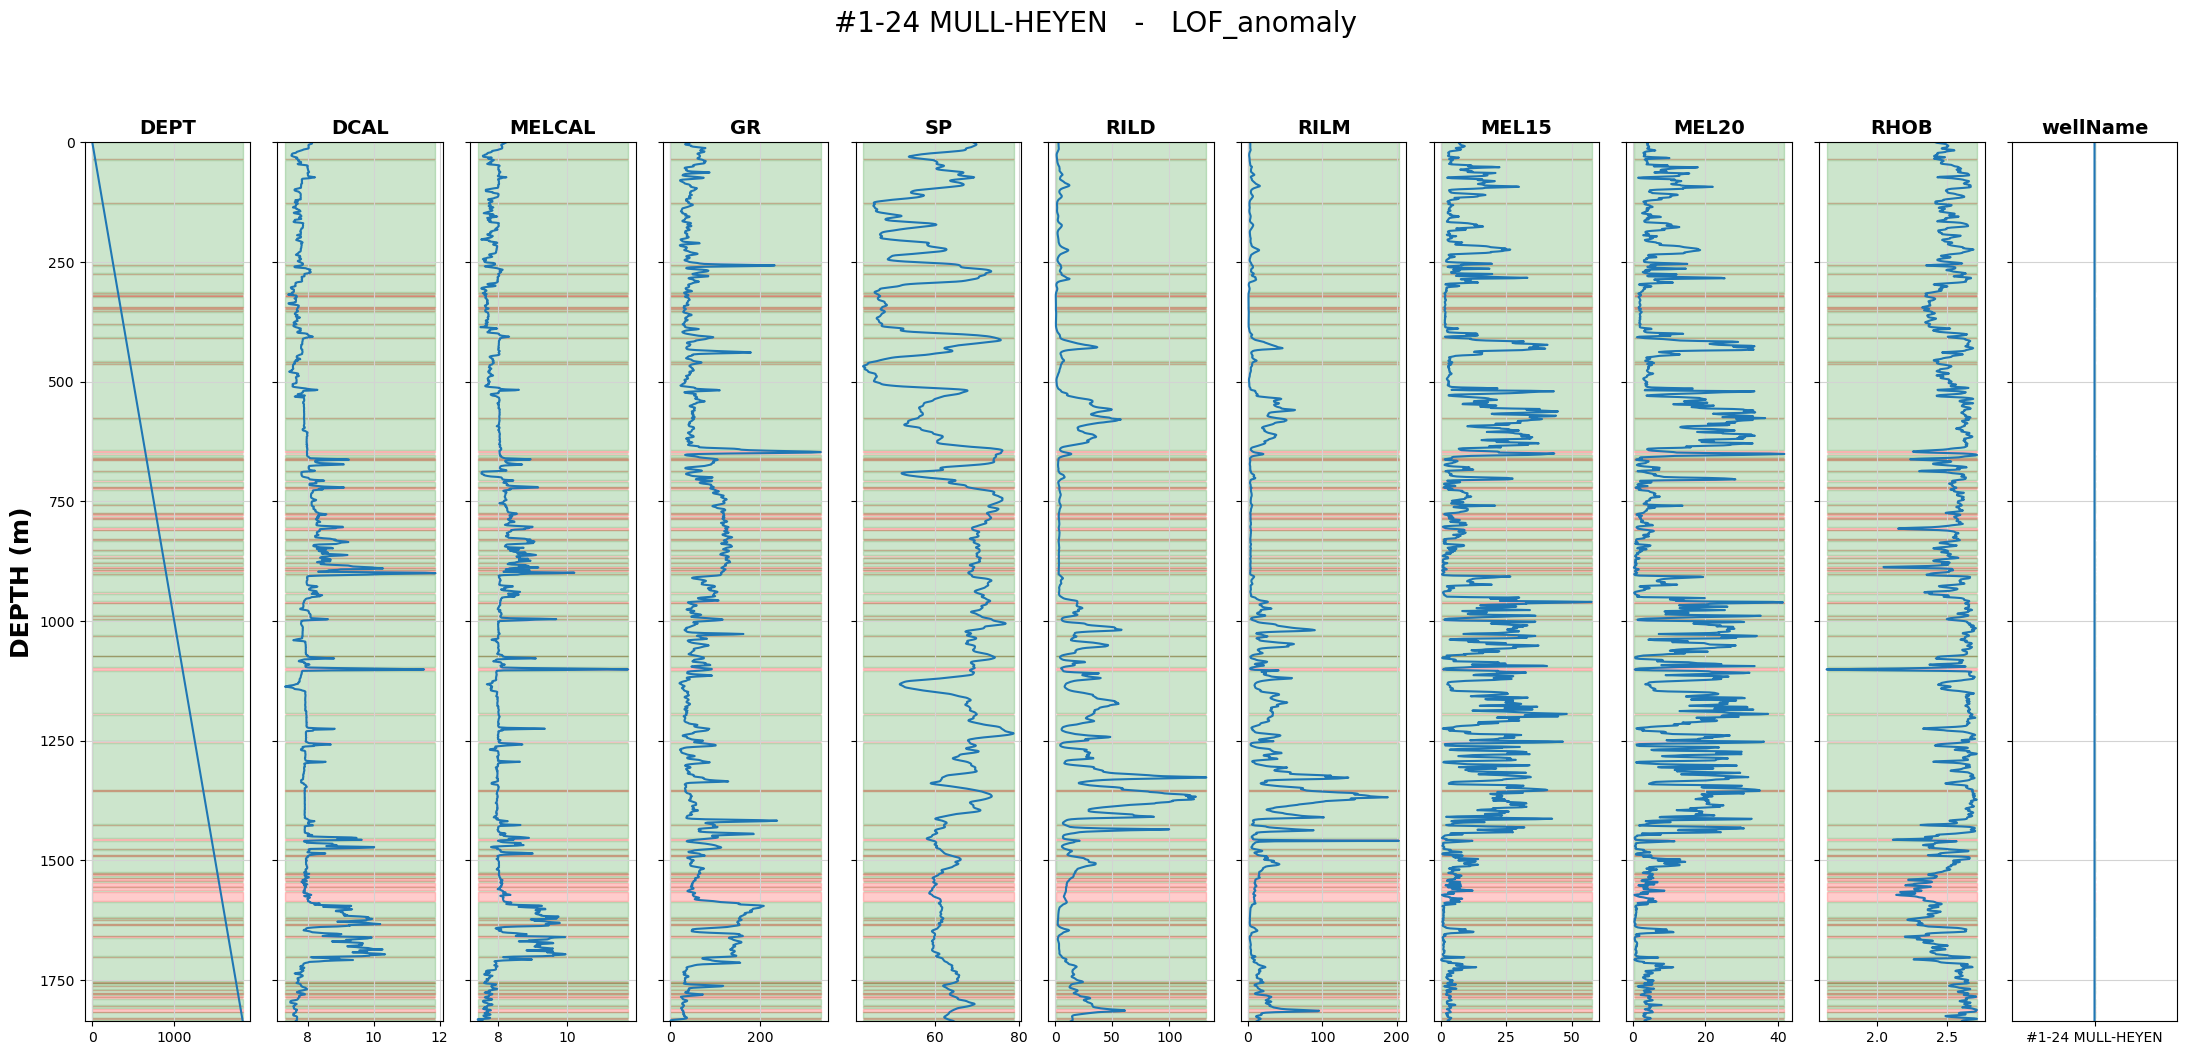

In [369]:
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPT'], 'IF_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPT'], 'SVM_anomaly')
create_outlier_plot(wellnames[well], dfs_wells[well], curves_to_plot, dfs_wells[well]['DEPT'], 'LOF_anomaly')

In [ ]:
from striplog import Legend

curve_legend_csv = """curve mnemonic, colour,     lw,     ls,     xlim,       xscale,     cmap,             curve   
MCAL,           gray,       0.3,   --,       ,           linear,     'viridis_r',    True
DCAL,           gray,       0.3,   --,       ,           linear,     'viridis_r',    True
GR,             blue,       1.0,   -,      ,           linear
SP,             red,        1.0,   -,       ,           linear
LAT,            lightgreen, 1.0,   -,       ,           log
MINV,           lightgreen, 1.0,   -,       ,           linear
MNOR,           lightblue,  1.0,   -,       ,            linear
DT,             green,      1.0,   -,       ,           linear
"""
legend = Legend.from_csv(text=curve_legend_csv)
# open las file with welly
well, = welly.read_las(r'..\Fields\Kansas Fields\ZENITH-PEACE CREEK\v1.3_filter_invalid_data\#1-24 MULL-HEYEN.las')



# well = Well.from_las(r'..\Fields\Kansas Fields\ZENITH-PEACE CREEK\v1.3_filter_invalid_data\#1-24 MULL-HEYEN.las')

tracks = ['MD', ['DCAL', 'MELCAL'], 'SP', 'GR', 'LAT', ['MINV', 'MNOR'], 'DT', 'TVD']
well.plot(tracks=tracks, legend=legend, alias=alias

)

#well.data['GR'].plot_2d(cmap='viridis_r', curve=True, lw=0.3, edgecolor='k')

# las =  lasio.read(r'..\Rio Zulia\RZ-WL_v8.4_last_corrections_SEP22\RZ-01.las')

# df = las.df()
# df.reset_index(inplace=True)


# Bibliografia y documentos de interes

# References


https://www.tensorflow.org/

## Color display well logs

https://www.sciencedirect.com/science/article/pii/009830048690066X

https://www.scopus.com/record/display.uri?eid=2-s2.0-85051530270&origin=inward&txGid=23eb4e2d1a61cbc3a9afd0a5c06ca17b

https://link.springer.com/article/10.1007/BF01032933

https://www.kgs.ku.edu/stratigraphic/PROFILE/HELP/colorlith/index.html

## Wiki well log OnePetro

https://petrowiki.spe.org/Category:5.6.1_Open_hole_or_cased_hole_log_analysis

# Quality data consideration for machine learning models

https://www.youtube.com/watch?v=Qx3JLQNQUww

# Outlier detection

https://towardsdatascience.com/well-log-data-outlier-detection-with-machine-learning-a19cafc5ea37